
#  
<a name = "top"></a>
<div align="center">
  <br>
  <h1>Machine Learning Vacancy Task</h1>
</div>
<br>

**Task:** Customer service teams receive requests on a wide variety of topics. You are asked to build a model that can automatically determine the type of request based on the text of the requests.

**Data:** It contains the information of requests received by the customer services for various problems. The incoming requests have different types (Ticket Type) like Technical error, Request for billing, and others. The total number of columns in the dataset is 17, and the total number of rows are 8469. Columns required to solve the problem:

- Ticket Subject
- Ticket Description
- Ticket Type

**Table of Contents:** The notebook will follow the steps outlined below
0. [Load and Check dataset](#0)
1. [Conducting preliminary analyzes (EDA) on data and displaying potentially valuable information](#1)
2. [Application and explanation of Data Preprocessing stage](#2)
3. [Application and explanation of Feature Engineering stage](#3)
4. [Model selection and model training. Model choices must be justified and the correct hyperparameters must be specified for the chosen model](#4)

 *Note:* *In the model selection phase, it is desirable to check both classical and Deep Learning models.*
5. [The accuracy of the model should be evaluated and shown](#5)
6. [Your ideas on how to deploy the model should be recorded](#6)

> For further information about the dataset and to download the dataset:
https://www.kaggle.com/datasets/suraj520/customer-support-ticket-dataset

## 0. Load and Check Dataset

In [ ]:
# Importing Libs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.lines as lines
sns.reset_defaults()
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import datetime as dt
plt.rcParams['figure.dpi'] = 140


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import TextVectorization

from tensorflow.keras import layers
import tensorflow as tf
import tensorflow_hub as hub
import tf_keras

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score, \
                            precision_score, \
                            recall_score, \
                            f1_score
from sklearn.model_selection import cross_val_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import gensim.downloader as api

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Below is the color palette that we will use for consistency in our EDA visuals:

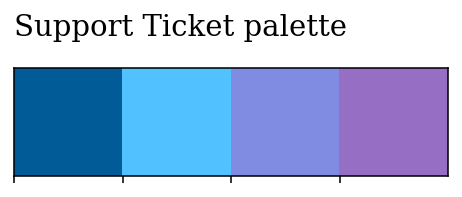

In [ ]:
colors = ['#005B96', '#51C1FF', '#808CE1', '#966EC3']
sns.palplot(colors)

plt.title("Support Ticket palette ",loc='left',fontfamily='serif',fontsize=15,y=1.2)
plt.show()

In [ ]:
df_original = pd.read_csv('/content/drive/MyDrive/Customer Support Tickets/customer_support_tickets.csv')
df_original.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


## 1. Exploratory Data Analysis (EDA)
<a name = "1"></a>
[⬆ Back to Top](#top)

Getting acquainted with the dataset:

In [ ]:
df = df_original.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

In [ ]:
df.describe()

,Ticket ID,Customer Age,Customer Satisfaction Rating
count,8469.000000,8469.000000,2769.000000
mean,4235.000000,44.026804,2.991333
std,2444.934048,15.296112,1.407016
min,1.000000,18.000000,1.000000
25%,2118.000000,31.000000,2.000000
50%,4235.000000,44.000000,3.000000
75%,6352.000000,57.000000,4.000000
max,8469.000000,70.000000,5.000000


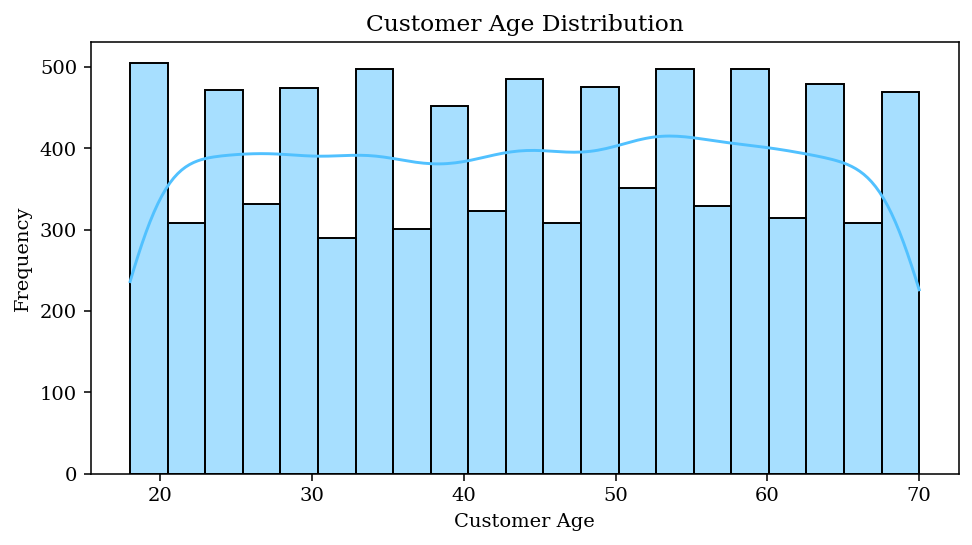

In [ ]:
plt.figure(figsize=(8, 4))
mpl.rcParams['font.family'] = 'serif'
sns.histplot(data=df, x='Customer Age', kde=True, color='#51C1FF')
plt.title('Customer Age Distribution')
plt.xlabel('Customer Age')
plt.ylabel('Frequency')
plt.show()

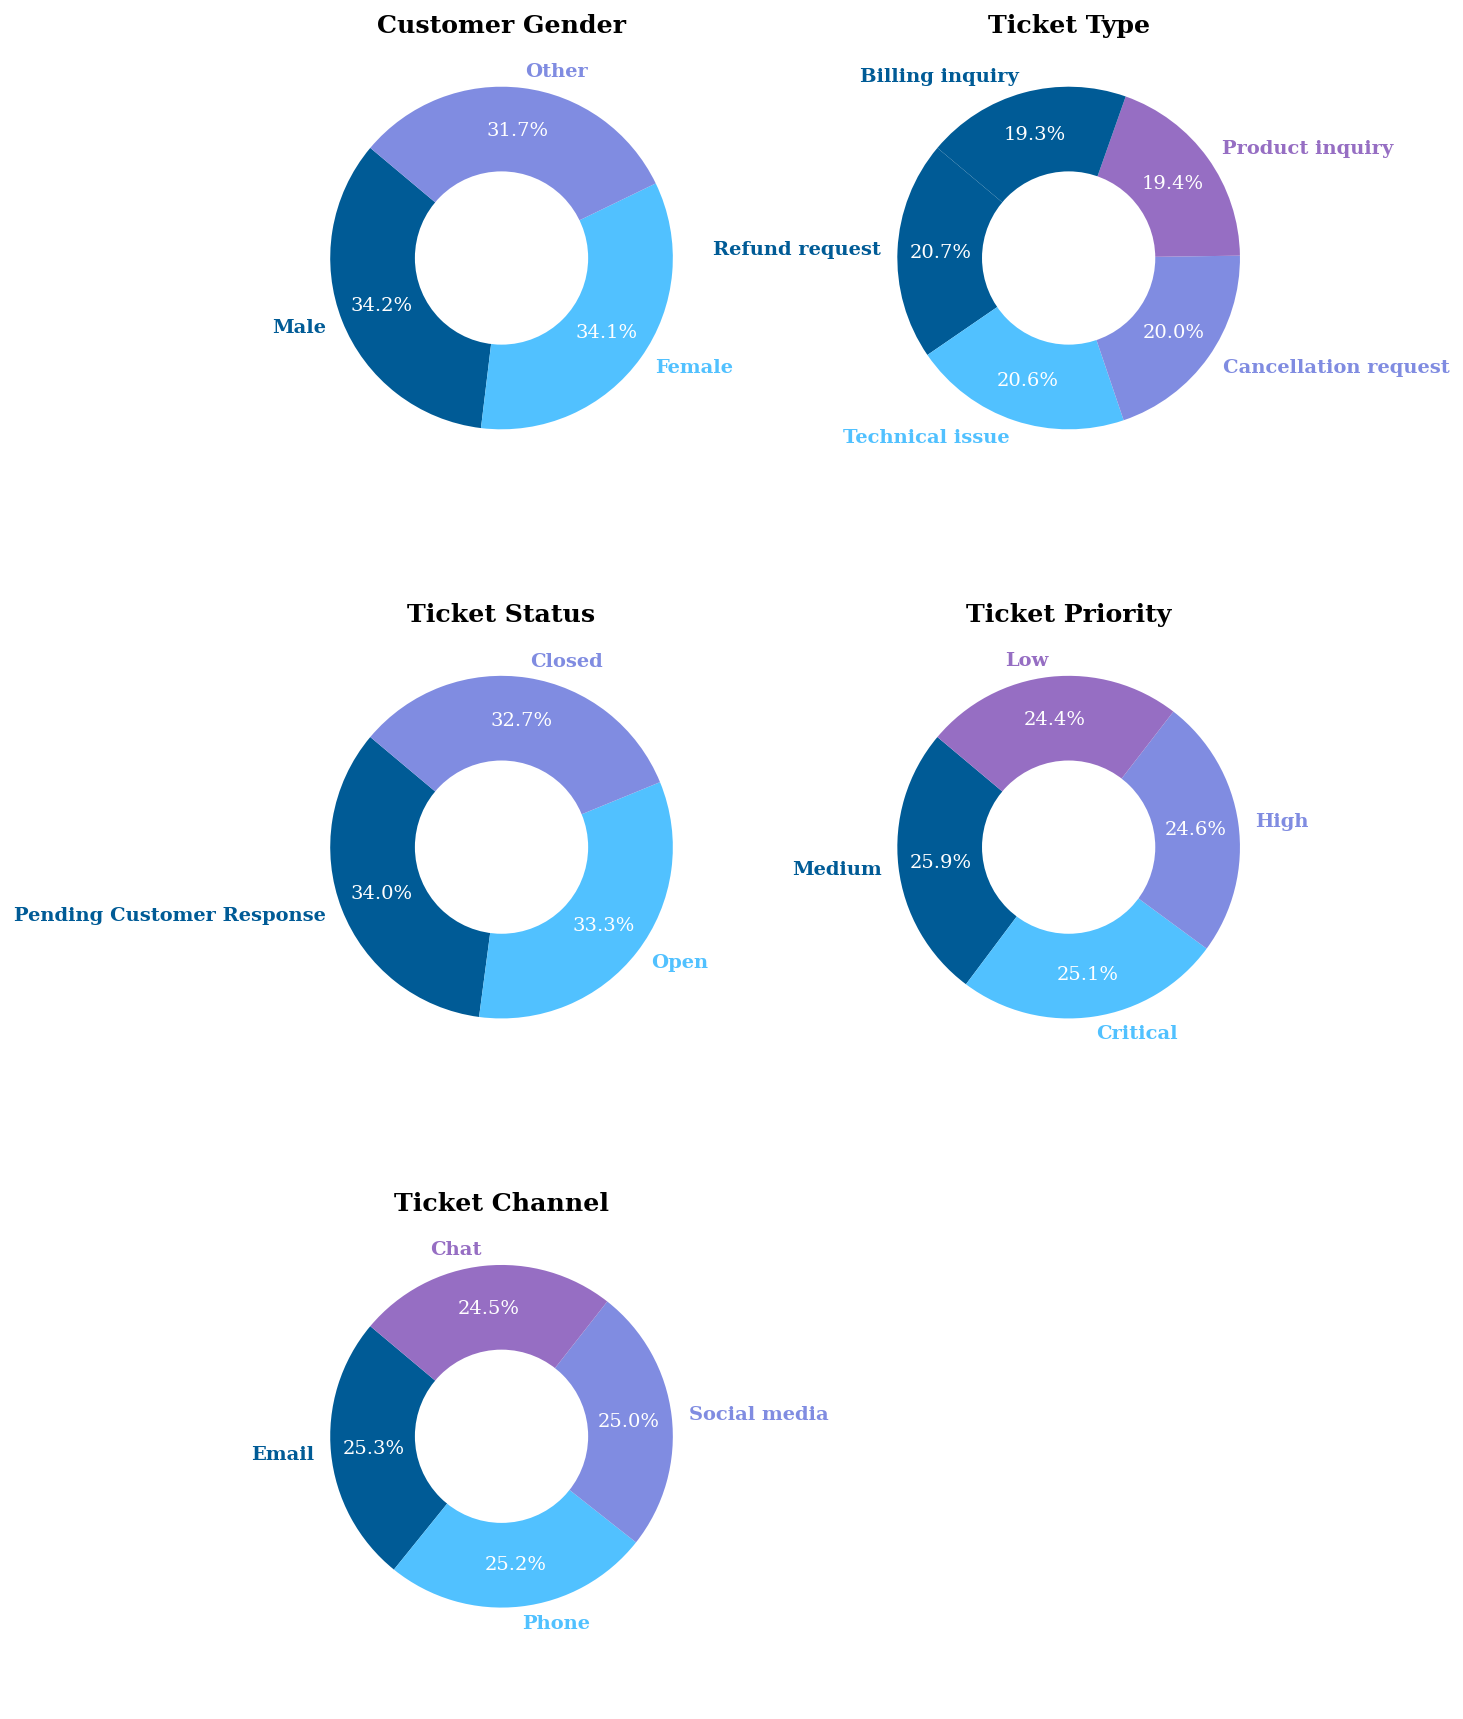

In [ ]:
import matplotlib.patches as mpatches

columns = ['Customer Gender', 'Ticket Type', 'Ticket Status', 'Ticket Priority', 'Ticket Channel']

fig, ax = plt.subplots(3, 2, figsize=(10, 13))

for idx, column in enumerate(columns):
    row = idx // 2
    col = idx % 2

    counts = df[column].value_counts()
    patches, texts, pcts = ax[row, col].pie(counts, autopct='%1.1f%%', colors=colors, startangle=140, labels=counts.index, pctdistance=0.75)
    ax[row, col].set_title(column, fontweight ="bold",fontfamily='serif', fontsize=13)
    plt.setp(pcts, color='white', fontfamily='serif')

    for i, patch in enumerate(patches):
      texts[i].set_color(patch.get_facecolor())
    plt.setp(texts, fontfamily='serif', fontweight='bold')

    center_circle = mpatches.Circle((0, 0), 0.5, color='white')
    ax[row, col].add_artist(center_circle)

plt.tight_layout()
ax[-1, -1].axis('off')

plt.show()

In [ ]:
df['Customer Satisfaction Rating'].mean().round(2)

2.99

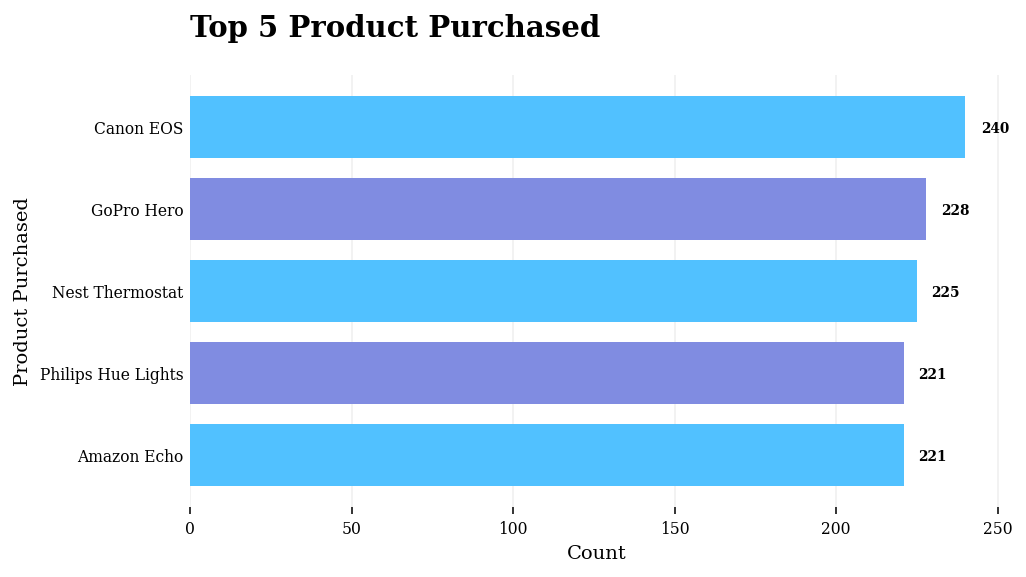

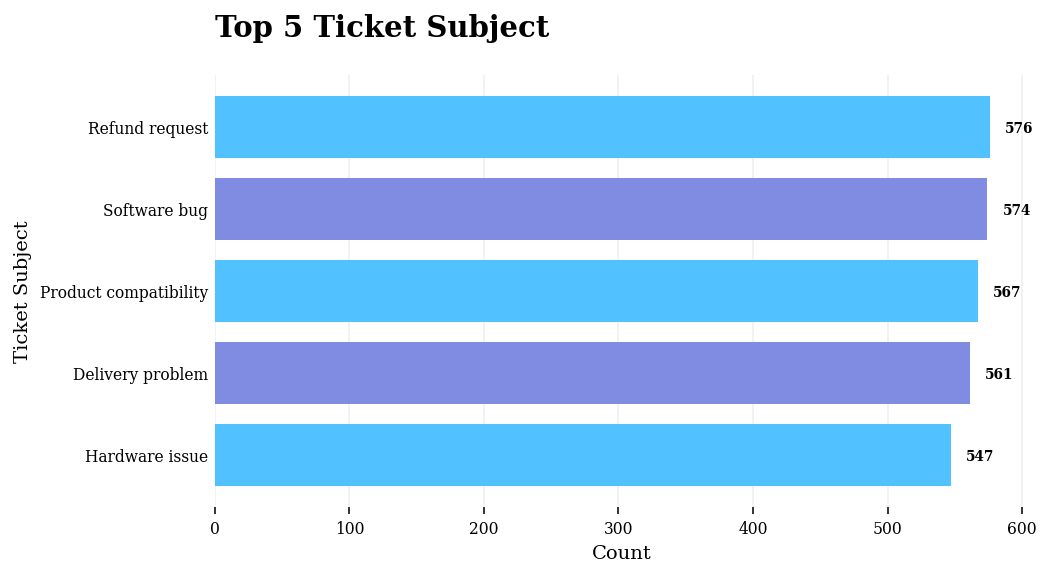

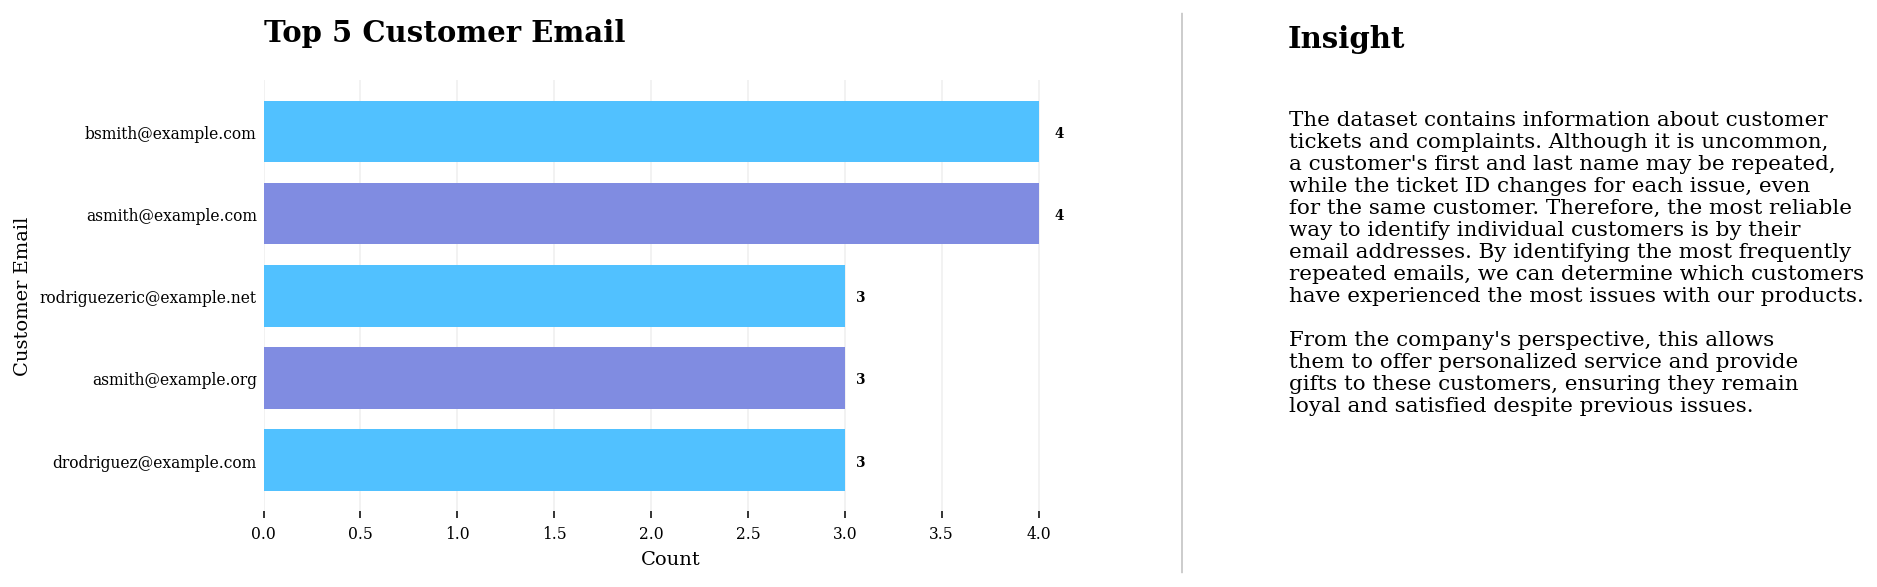

In [ ]:
cols=[ 'Product Purchased', 'Ticket Subject', 'Customer Email']

for col in cols:
    fig, ax = plt.subplots(figsize=(7.5, 4))

    df[col].value_counts()[:5][::-1].plot(kind='barh', ax=ax, color=[ '#51C1FF', '#808CE1'], width=0.75)

    for i, value in enumerate(df[col].value_counts()[:5][::-1]):
        ax.text(value+value*0.02, i, str(value), va='center_baseline', fontweight='bold', fontfamily='serif', fontsize=7)

    ax.set_title(f'Top 5 {col}', fontweight="bold", fontfamily='serif', fontsize=15, pad=20, loc='left')
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)
    ax.xaxis.grid(alpha=0.2)
    ax.set_axisbelow(True)
    ax.set_xlabel('Count',  fontfamily='serif')
    ax.set_ylabel(f'{col}', fontfamily='serif')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis=u'y', which=u'both',length=0)

    if col == 'Customer Email':
        l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig, color='black', lw=0.2)
        fig.lines.extend([l1])

        fig.text(1.1, 0.94, 'Insight', fontsize=15, fontweight='bold', fontfamily='serif', transform=fig.transFigure)
        fig.text(1.05, 0.25, '''
        The dataset contains information about customer
        tickets and complaints. Although it is uncommon,
        a customer's first and last name may be repeated,
        while the ticket ID changes for each issue, even
        for the same customer. Therefore, the most reliable
        way to identify individual customers is by their
        email addresses. By identifying the most frequently
        repeated emails, we can determine which customers
        have experienced the most issues with our products.

        From the company's perspective, this allows
        them to offer personalized service and provide
        gifts to these customers, ensuring they remain
        loyal and satisfied despite previous issues.
                ''', fontsize=11, fontweight='light', fontfamily='serif', transform=fig.transFigure)

    plt.show()
    print('\n' * 4)

In [ ]:
# age groups column created
bins = [0, 30, 40, 50, 60, 70, 120]
group = ['<30', '30-40', '40-50', '50-60', '60-70', '70>']
df['Age Group'] = pd.cut(df['Customer Age'], bins=bins, labels=group, right=False)

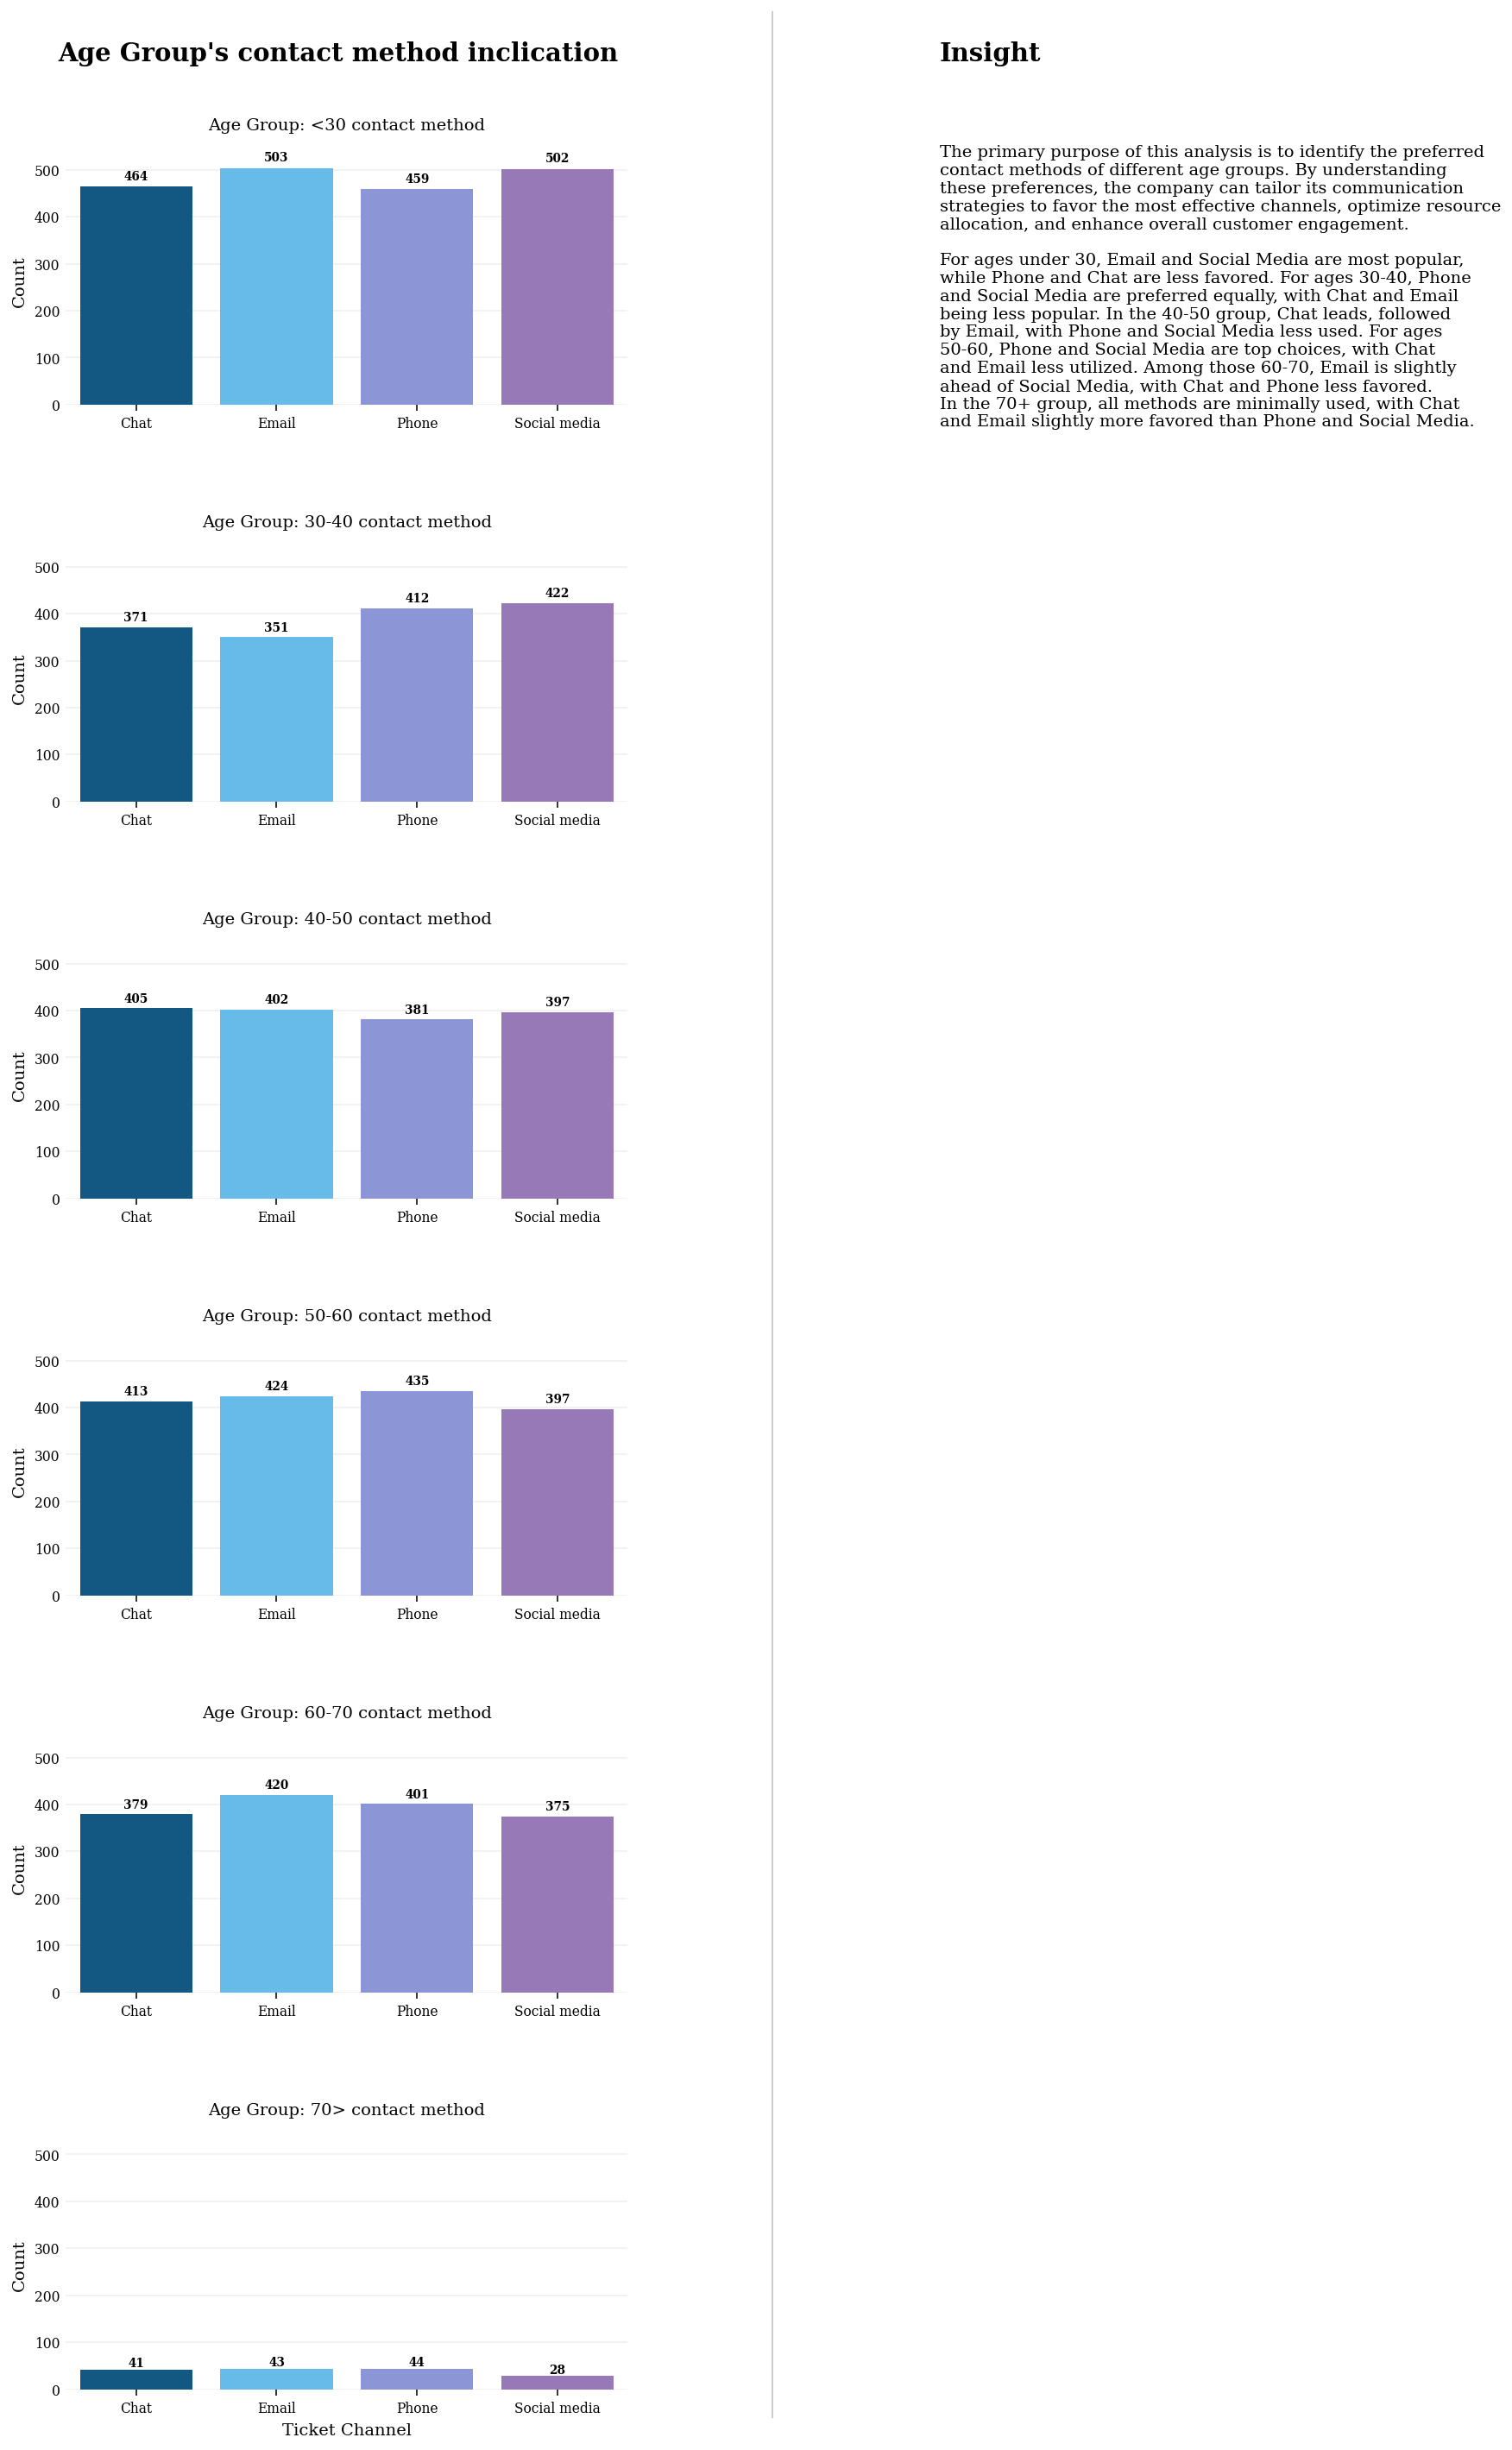

In [ ]:
count_data = df.groupby(['Age Group', 'Ticket Channel']).size().reset_index(name='Count')
# count_data = count_data.sort_values(by=['Age Group', 'Count'], ascending=[True, False])

# Plot using FacetGrid
g = sns.FacetGrid(count_data, row='Age Group', height=4, aspect=1.5,  sharex=False, gridspec_kws={"hspace":0.6})
g.map_dataframe(sns.barplot, x='Ticket Channel', y='Count', palette=colors)
g.set_titles(row_template='Age Group: {row_name} contact method', pad=16)
for ax in g.axes.flat:
    # Add count labels on top of each bar
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width() / 2.,  # x position of the text
            height + 0.02 * height,  # y position of the text
            f'{int(height)}',  # text to display
            ha='center',  # horizontal alignment
            va='bottom',  # vertical alignment
            fontweight='bold', fontfamily='serif', fontsize=7
        )
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis=u'y', which=u'both',length=0)
    ax.yaxis.grid(alpha=0.2)
    ax.set_axisbelow(True)
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)

# Add figure text
fig = plt.gcf()  # Get the current figure
fig.suptitle('Age Group\'s contact method inclication', fontsize=15, fontweight='bold', fontfamily='serif', y=0.92)

l1 = lines.Line2D([1.1, 1.1], [0.1, 0.93], transform=fig.transFigure, figure=fig, color='black', lw=0.2)
fig.lines.extend([l1])

fig.text(1.4, 0.913, 'Insight', fontsize=15, fontweight='bold', fontfamily='serif', ha='center', transform=fig.transFigure)
fig.text(1.33, 0.787, '''
The primary purpose of this analysis is to identify the preferred
contact methods of different age groups. By understanding
these preferences, the company can tailor its communication
strategies to favor the most effective channels, optimize resource
allocation, and enhance overall customer engagement.

For ages under 30, Email and Social Media are most popular,
while Phone and Chat are less favored. For ages 30-40, Phone
and Social Media are preferred equally, with Chat and Email
being less popular. In the 40-50 group, Chat leads, followed
by Email, with Phone and Social Media less used. For ages
50-60, Phone and Social Media are top choices, with Chat
and Email less utilized. Among those 60-70, Email is slightly
ahead of Social Media, with Chat and Phone less favored.
In the 70+ group, all methods are minimally used, with Chat
and Email slightly more favored than Phone and Social Media.''', fontsize=10, fontweight='light', fontfamily='serif', ha='left', transform=fig.transFigure)


plt.show()

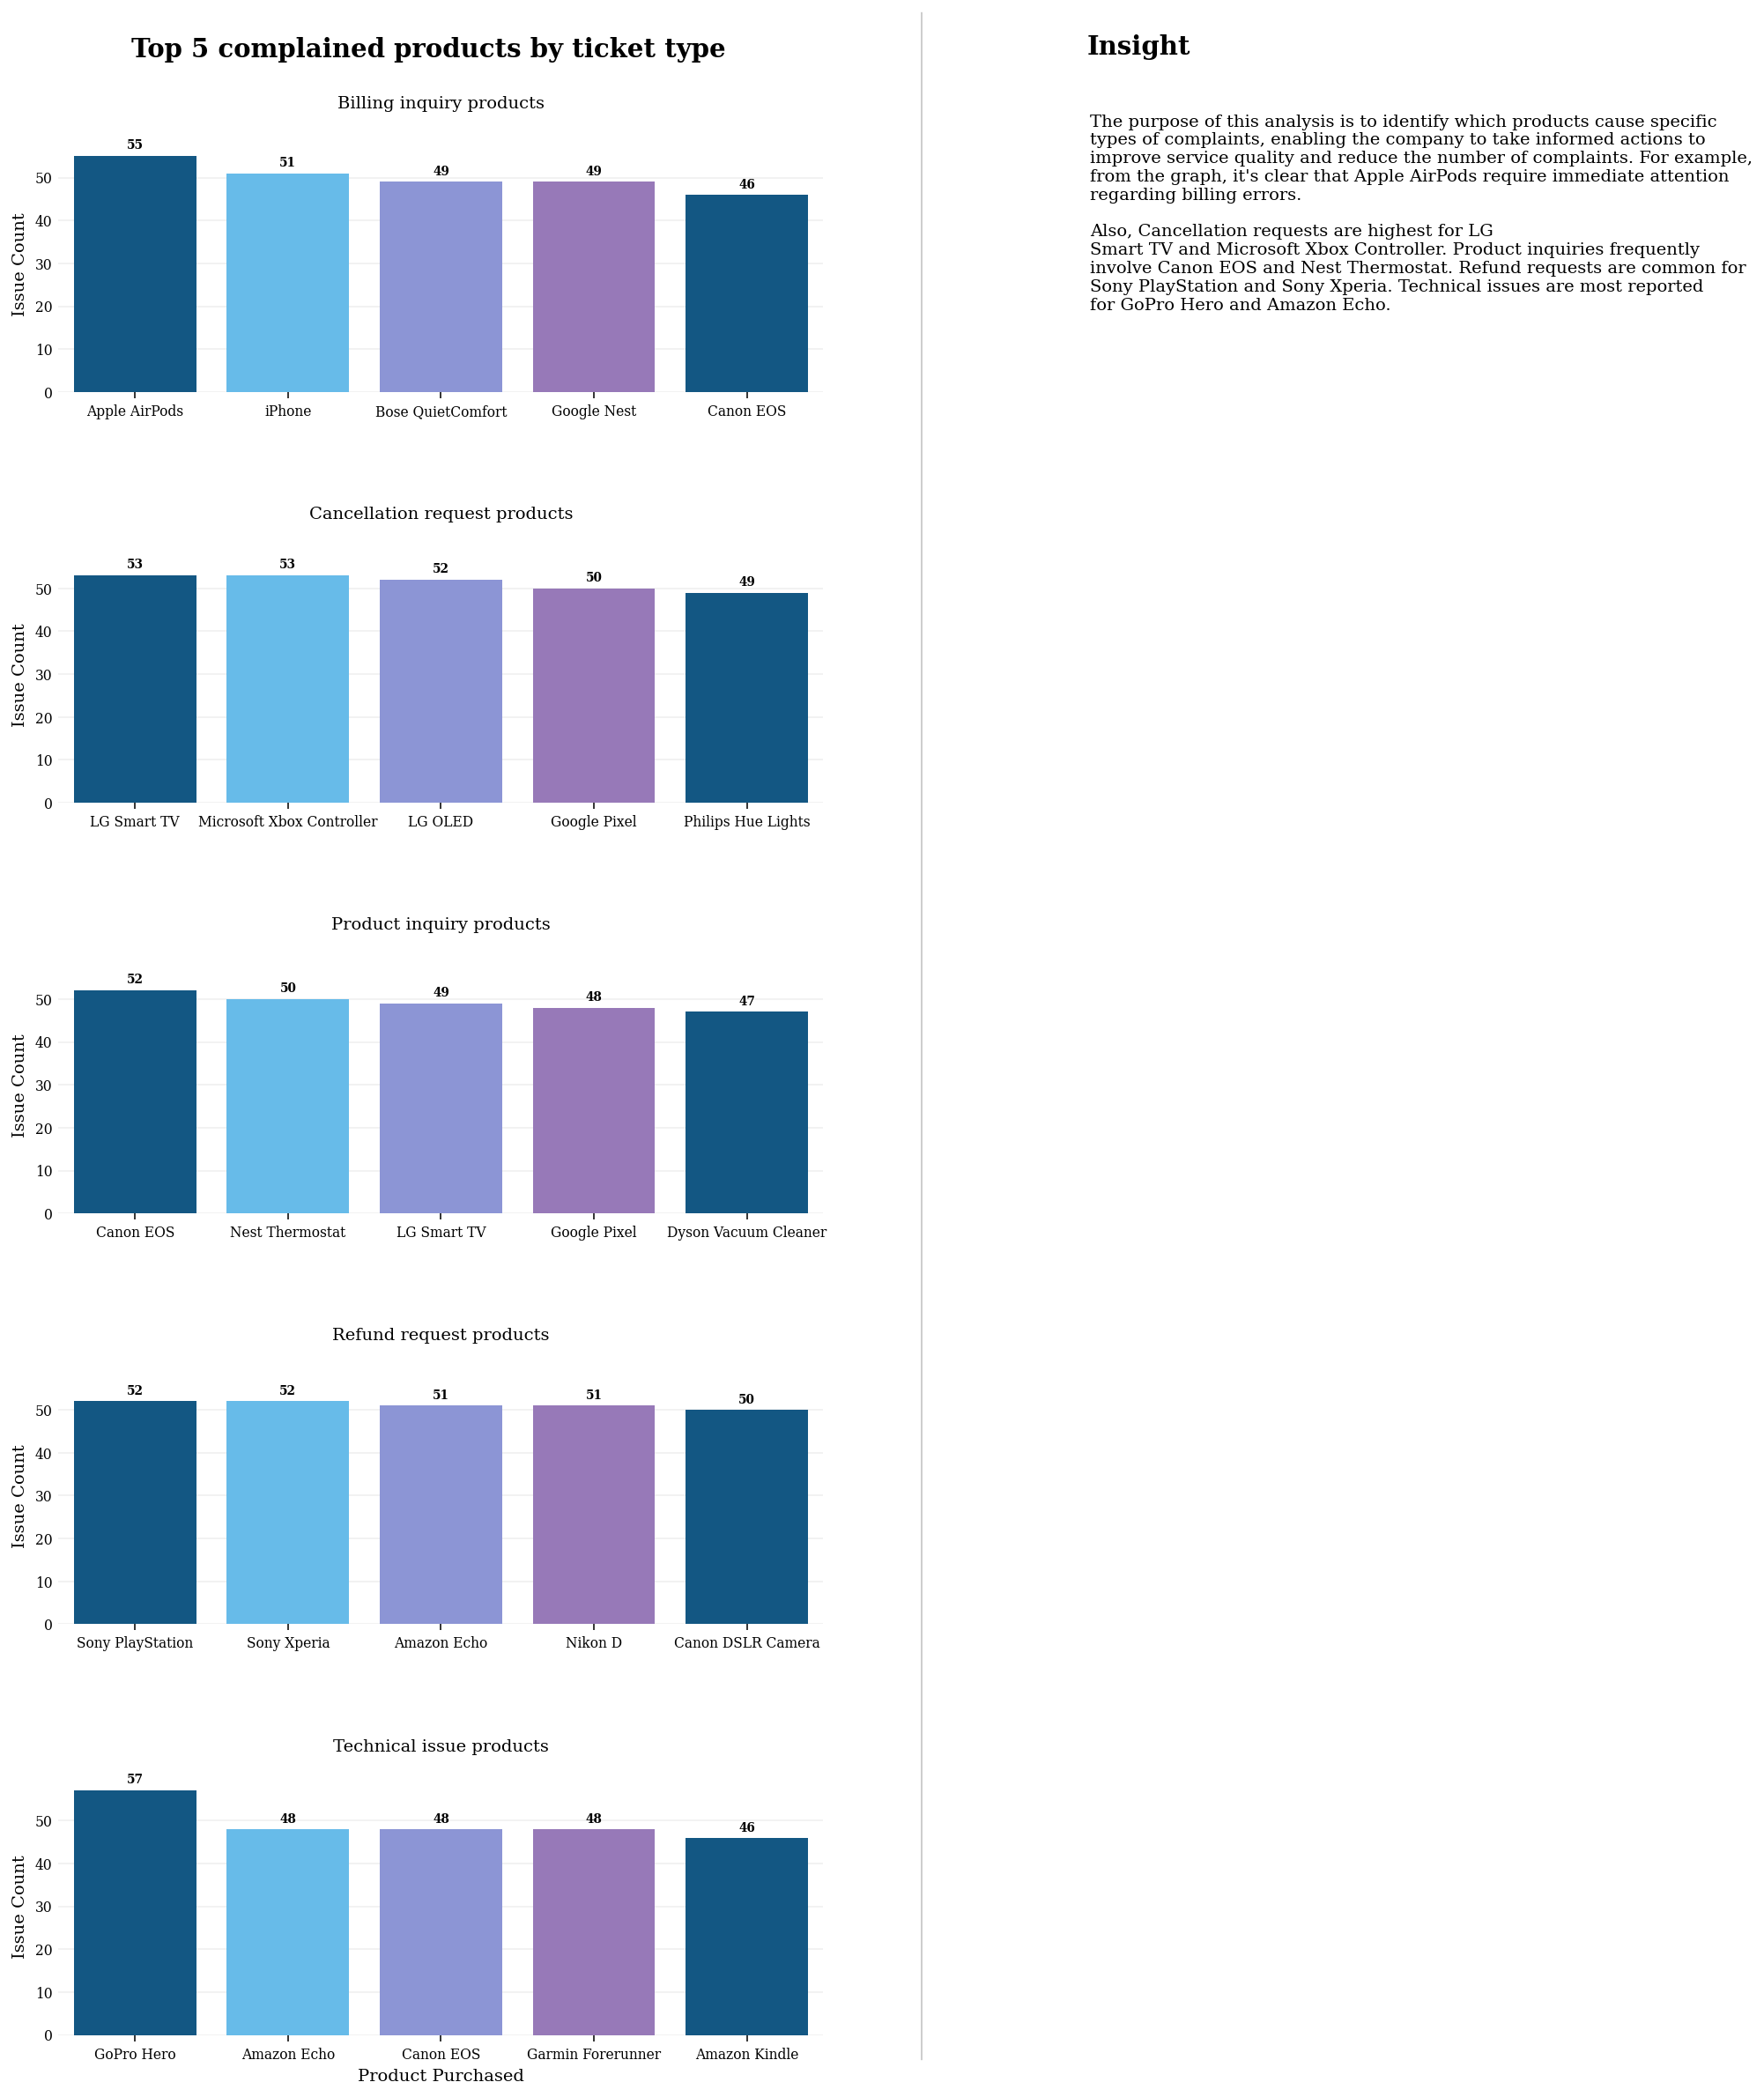

In [ ]:
count_data = df.groupby(['Ticket Type', 'Product Purchased']).size().reset_index(name='Count')
count_data = count_data.groupby('Ticket Type').apply(lambda x: x.nlargest(5, 'Count')).reset_index(drop=True)

# Plot using FacetGrid
g = sns.FacetGrid(count_data, row='Ticket Type', height=4, aspect=2,  sharex=False, gridspec_kws={"hspace":0.6})
g.map_dataframe(sns.barplot, x='Product Purchased', y='Count', palette=colors)
g.set_titles(row_template='{row_name} products', pad=16)
g.set_ylabels('Issue Count')
for ax in g.axes.flat:
    # Add count labels on top of each bar
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width() / 2.,  # x position of the text
            height + 0.02 * height,  # y position of the text
            f'{int(height)}',  # text to display
            ha='center',  # horizontal alignment
            va='bottom',  # vertical alignment
            fontweight='bold', fontfamily='serif', fontsize=7
        )
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis=u'y', which=u'both',length=0)
    ax.yaxis.grid(alpha=0.2)
    ax.set_axisbelow(True)
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)

# Add figure text
fig = plt.gcf()  # Get the current figure
fig.suptitle('Top 5 complained products by ticket type', fontsize=15, fontweight='bold', fontfamily='serif', y=0.92)

l1 = lines.Line2D([1, 1], [0.1, 0.93], transform=fig.transFigure, figure=fig, color='black', lw=0.2)
fig.lines.extend([l1])

fig.text(1.22, 0.913, 'Insight', fontsize=15, fontweight='bold', fontfamily='serif', ha='center', transform=fig.transFigure)
fig.text(1.17, 0.802, '''
The purpose of this analysis is to identify which products cause specific
types of complaints, enabling the company to take informed actions to
improve service quality and reduce the number of complaints. For example,
from the graph, it's clear that Apple AirPods require immediate attention
regarding billing errors.

Also, Cancellation requests are highest for LG
Smart TV and Microsoft Xbox Controller. Product inquiries frequently
involve Canon EOS and Nest Thermostat. Refund requests are common for
Sony PlayStation and Sony Xperia. Technical issues are most reported
for GoPro Hero and Amazon Echo.
''', fontsize=10, fontweight='light', fontfamily='serif', ha='left', transform=fig.transFigure)


plt.show()

In [ ]:
df['Date of Purchase'] = pd.to_datetime(df['Date of Purchase'], format='%Y-%m-%d')
df['First Response Time'] = pd.to_datetime(df['First Response Time'], format='%Y-%m-%d %H:%M:%S')
df = df.sort_values(by='Date of Purchase')
df['Response Lag'] = ((df['First Response Time'] - df['Date of Purchase']).dt.total_seconds() / (365.25 * 24 * 3600)).round(2)

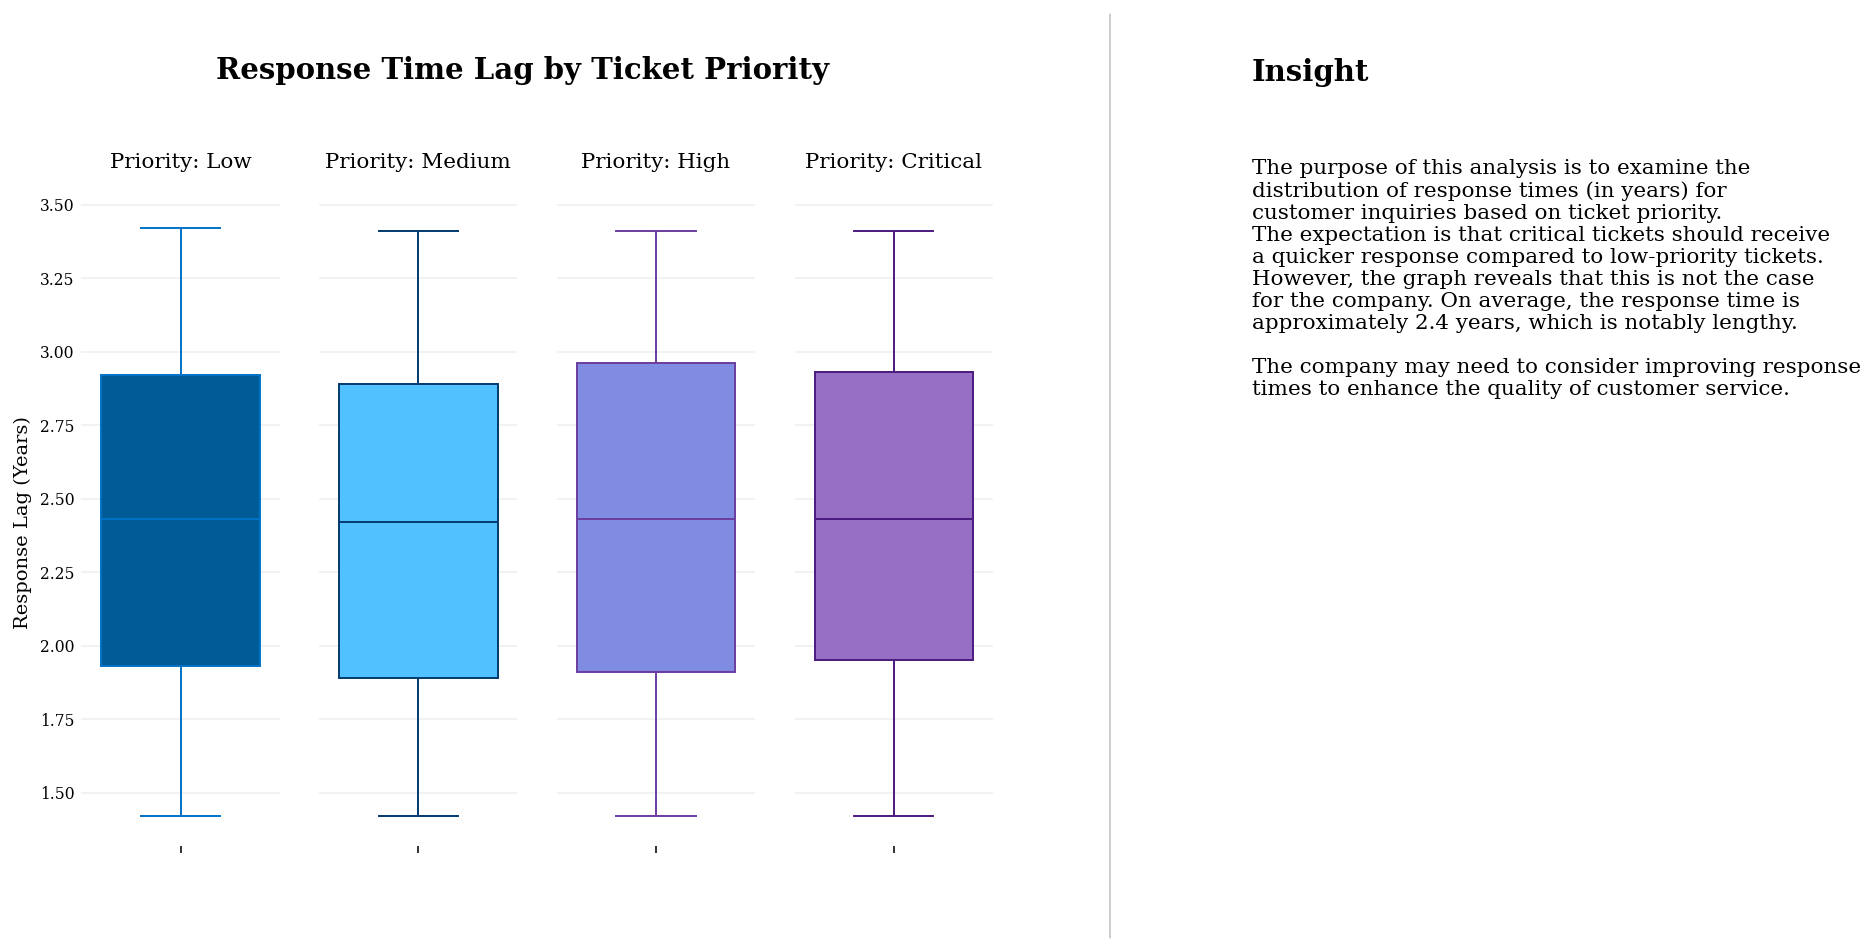

In [ ]:
priority_order = ['Low', 'Medium', 'High', 'Critical']
palette = dict(zip(priority_order, colors))
darker_colors = ['#0072C6', '#003B6F', "#6A3D9F", '#4B1A7F']
darker_palette = dict(zip(priority_order, darker_colors))

# Set up the FacetGrid
g = sns.FacetGrid(df, col='Ticket Priority', height=6, aspect=0.35, sharex=False, gridspec_kws={"hspace":0.6}, col_order=priority_order)

# Define custom boxplot function
def custom_boxplot(ax, data, color):
    sns.boxplot(data=data, ax=ax, color=color, patch_artist=True,
                boxprops=dict(facecolor=color, edgecolor=darker_palette[priority]),  # Light fill, darker outline
                capprops=dict(color=darker_palette[priority]),
                whiskerprops=dict(color=darker_palette[priority]),
                flierprops=dict(markeredgecolor=darker_palette[priority], color=color),
                medianprops=dict(color=darker_palette[priority]))
    ax.set_ylabel('Response Lag (Years)', fontsize=10, fontfamily='serif')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='y', which='both', length=0, labelsize=8)
    ax.yaxis.grid(alpha=0.2)
    ax.set_axisbelow(True)
    ax.tick_params(axis='x', labelsize=8)

# Map boxplot with custom function
for ax, priority in zip(g.axes.flat, priority_order):
    ax.clear()
    color = palette[priority]
    data = df[df['Ticket Priority'] == priority]['Response Lag']
    custom_boxplot(ax, data, color)
    ax.set_title(f'Priority: {priority}', pad=16, fontsize=11, fontfamily='serif')

# Add figure text
fig = plt.gcf()
fig.suptitle('Response Time Lag by Ticket Priority', fontsize=15, fontweight='bold', fontfamily='serif', y=1.05)

l1 = lines.Line2D([1, 1], [0, 1.1], transform=fig.transFigure, figure=fig, color='black', lw=0.2)
fig.lines.extend([l1])

fig.text(1.17, 1.02, 'Insight', fontsize=15, fontweight='bold', fontfamily='serif', ha='center', transform=fig.transFigure)
fig.text(1.12, 0.62, '''
The purpose of this analysis is to examine the
distribution of response times (in years) for
customer inquiries based on ticket priority.
The expectation is that critical tickets should receive
a quicker response compared to low-priority tickets.
However, the graph reveals that this is not the case
for the company. On average, the response time is
approximately 2.4 years, which is notably lengthy.

The company may need to consider improving response
times to enhance the quality of customer service.
''', fontsize=11, fontweight='light', fontfamily='serif', ha='left', transform=fig.transFigure)

plt.show()

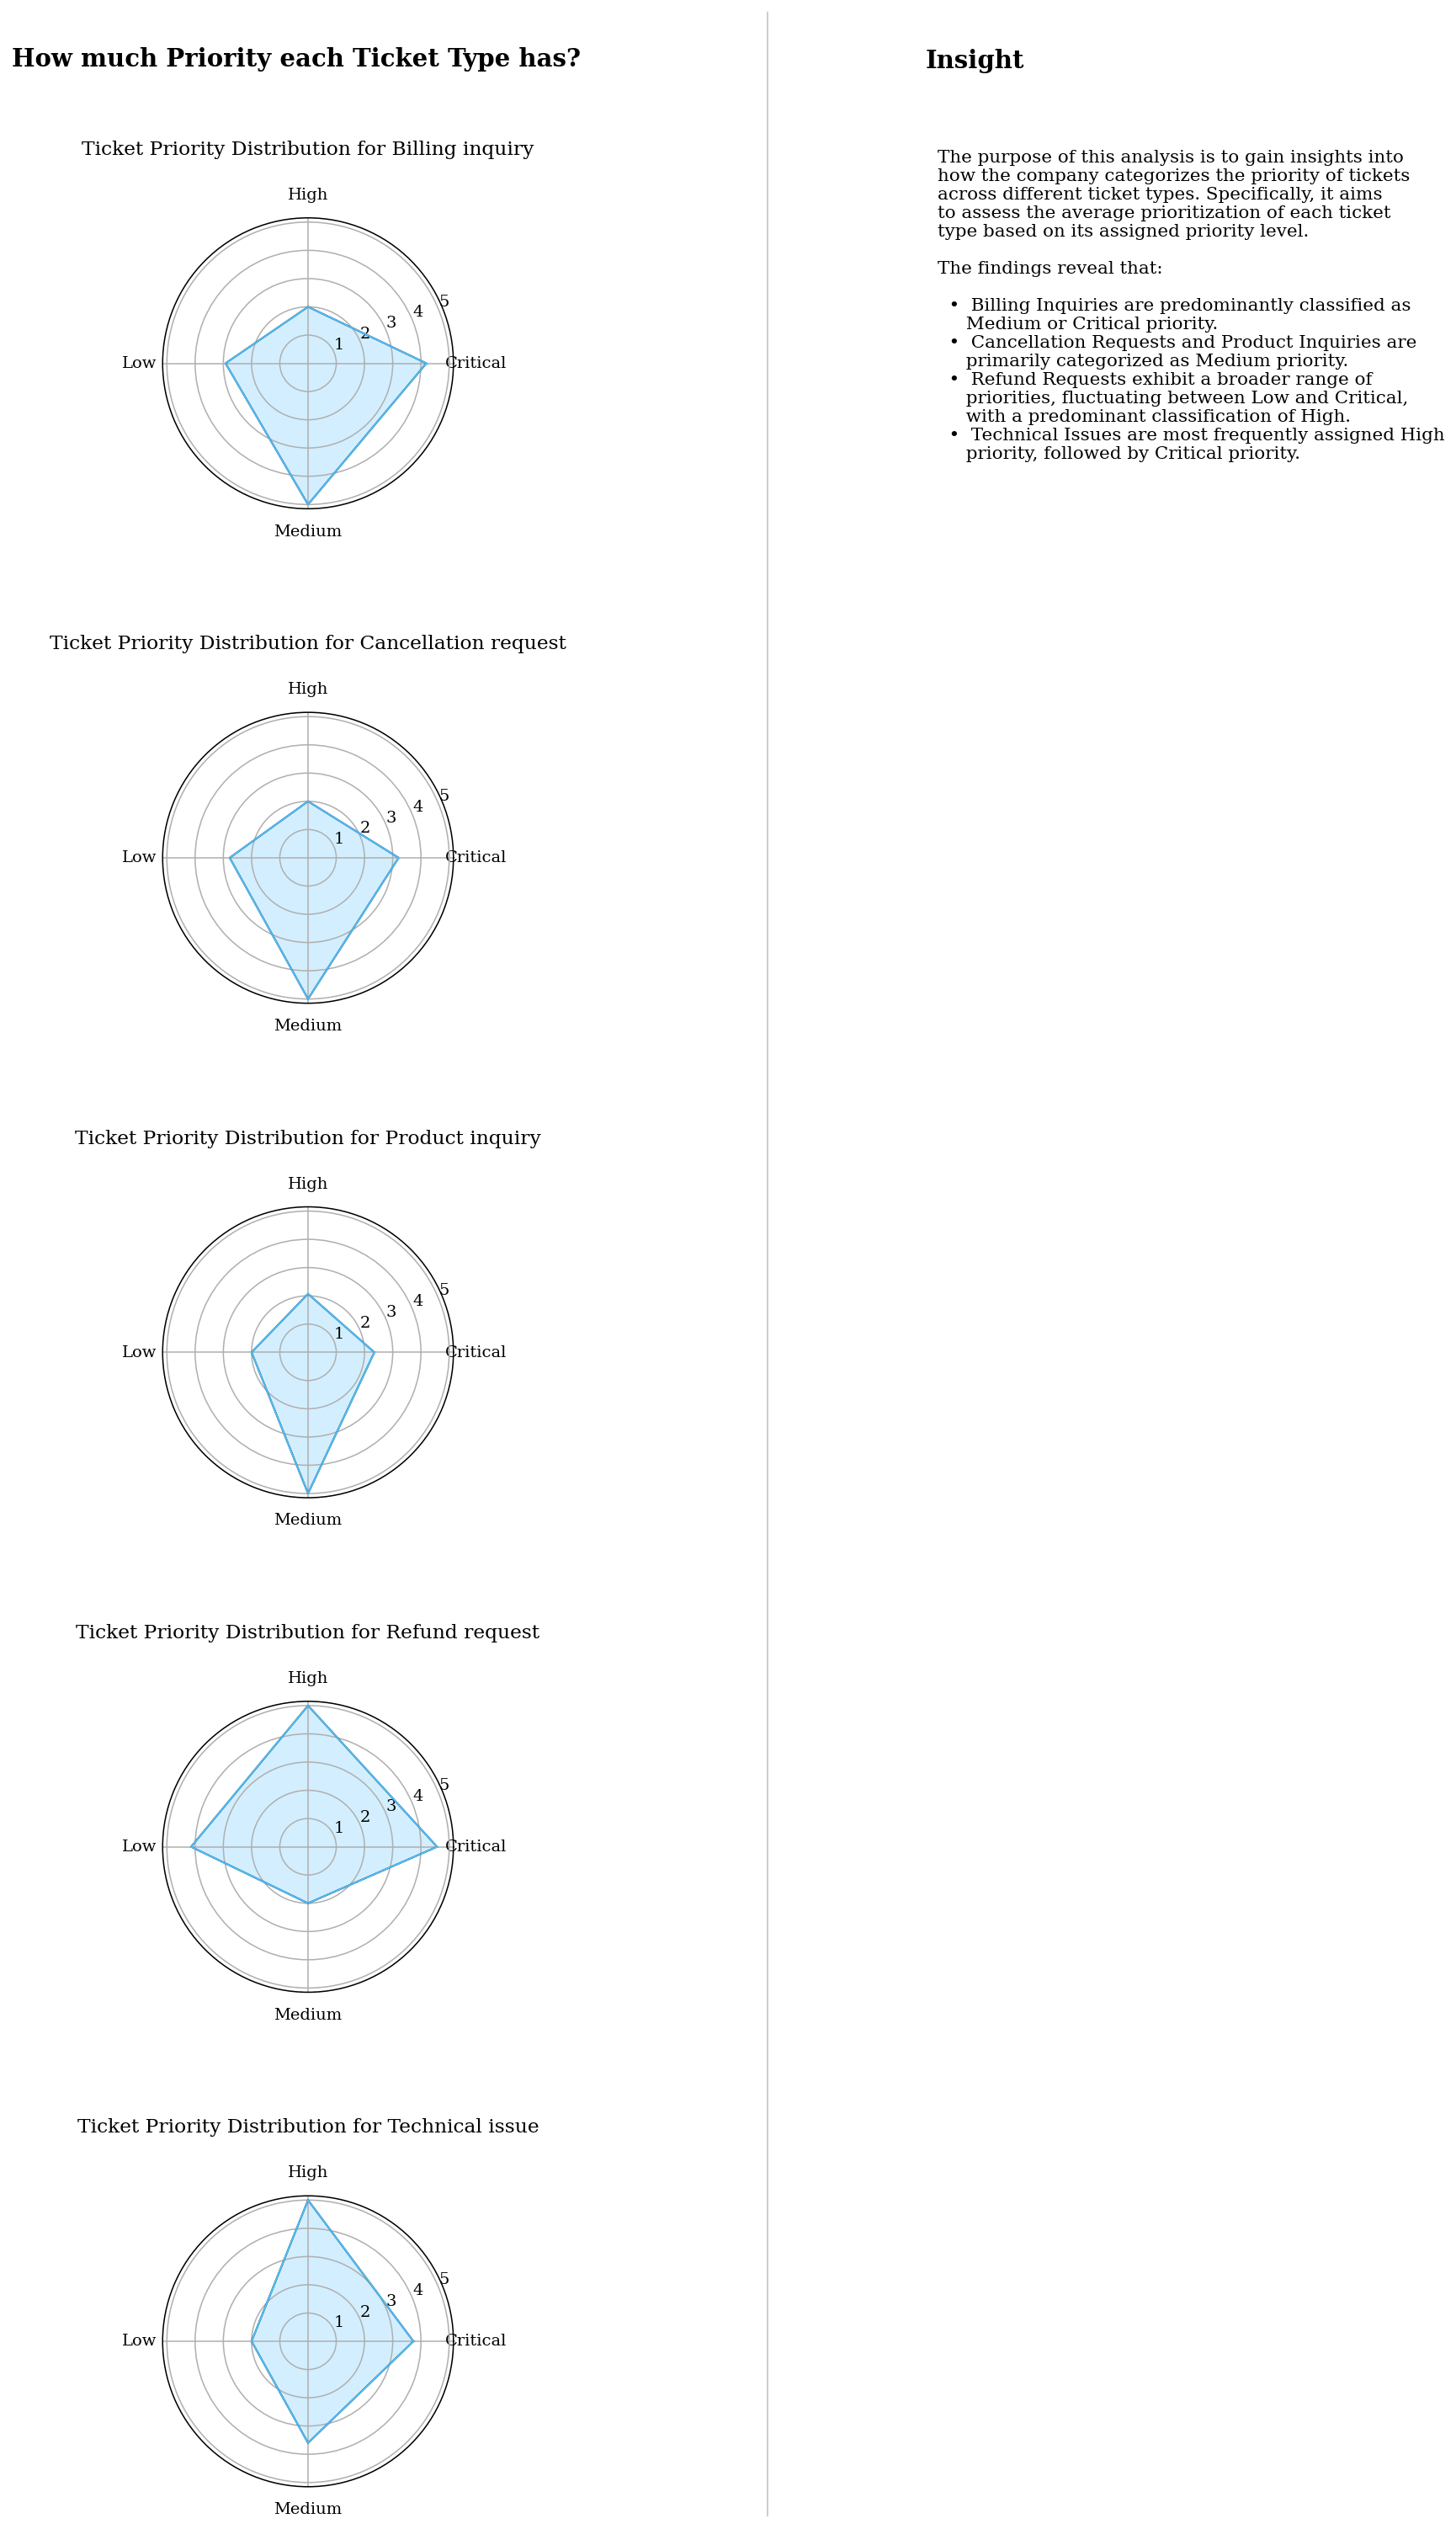

In [ ]:
count_data = df.groupby('Ticket Type')['Ticket Priority'].value_counts().reset_index(name='Count')
pivot_df = count_data.pivot_table(index='Ticket Type', columns='Ticket Priority', values='Count', fill_value=0)

# min-max scaling the value_counts to make differences visible
for index, row in pivot_df.iterrows():
    min_val = row.min()
    max_val = row.max()
    pivot_df.loc[index] = 2 + 3 * (row - min_val) / (max_val - min_val)

num_types = len(pivot_df)

fig, axs = plt.subplots(num_types, 1, figsize=(8, 5 * num_types), subplot_kw=dict(polar=True))
fig.subplots_adjust(hspace=0.7)

# Create radar charts for each ticket type
for ax, (ticket_type, values) in zip(axs, pivot_df.iterrows()):
    categories = list(pivot_df.columns)
    values = values.tolist()

    num_vars = len(categories)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    values += values[:1]
    angles += angles[:1]

    # Draw the outline and fill area
    ax.plot(angles, values, color='black', linewidth=1)
    ax.plot(angles, values, color=colors[1], linewidth=1)
    ax.fill(angles, values, color=colors[1], alpha=0.25)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=10)
    ax.set_title(f'Ticket Priority Distribution for {ticket_type}', size=12, color='black', pad=20)

# Add figure text
fig = plt.gcf()
fig.suptitle('How much Priority each Ticket Type has?', fontsize=15, fontweight='bold', fontfamily='serif', y=0.938)

l1 = lines.Line2D([1, 1], [0.1, 0.95], transform=fig.transFigure, figure=fig, color='black', lw=0.2)
fig.lines.extend([l1])

fig.text(1.22, 0.931, 'Insight', fontsize=15, fontweight='bold', fontfamily='serif', ha='center', transform=fig.transFigure)
fig.text(1.18, 0.792, '''
The purpose of this analysis is to gain insights into
how the company categorizes the priority of tickets
across different ticket types. Specifically, it aims
to assess the average prioritization of each ticket
type based on its assigned priority level.

The findings reveal that:

  •  Billing Inquiries are predominantly classified as
     Medium or Critical priority.
  •  Cancellation Requests and Product Inquiries are
     primarily categorized as Medium priority.
  •  Refund Requests exhibit a broader range of
     priorities, fluctuating between Low and Critical,
     with a predominant classification of High.
  •  Technical Issues are most frequently assigned High
     priority, followed by Critical priority.
''', fontsize=11, fontweight='light', fontfamily='serif', ha='left', transform=fig.transFigure)

plt.show()


Lastly, output variable seems enough balanced:

In [ ]:
df['Ticket Type'].value_counts()

Ticket Type
Refund request          1752
Technical issue         1747
Cancellation request    1695
Product inquiry         1641
Billing inquiry         1634
Name: count, dtype: int64

## 2. Data Preprocessing
<a name = "2"></a>
[⬆ Back to Top](#top)

In [ ]:
df = df_original.copy()

In [ ]:
df.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [ ]:
df['Date of Purchase'] = pd.to_datetime(df['Date of Purchase'], format='%Y-%m-%d')
df = df.sort_values(by='Date of Purchase')

2769 instances are too small of a dataset. If we interpolate, we would affect the data to such a degree that the model may develop a significant bias without us realizing it. Therefore, we'll drop them.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8469 entries, 1331 to 4975
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Ticket ID                     8469 non-null   int64         
 1   Customer Name                 8469 non-null   object        
 2   Customer Email                8469 non-null   object        
 3   Customer Age                  8469 non-null   int64         
 4   Customer Gender               8469 non-null   object        
 5   Product Purchased             8469 non-null   object        
 6   Date of Purchase              8469 non-null   datetime64[ns]
 7   Ticket Type                   8469 non-null   object        
 8   Ticket Subject                8469 non-null   object        
 9   Ticket Description            8469 non-null   object        
 10  Ticket Status                 8469 non-null   object        
 11  Resolution                    27

We'll also drop other categories that doesn't serve to our target variable (Ticket Type).

In [ ]:
df.drop(['Ticket ID', 'Customer Name', 'Customer Email', 'Ticket Status', 'Resolution', 'First Response Time', 'Time to Resolution', 'Customer Satisfaction Rating'], axis=1, inplace=True)

**Age**: Younger generations may handle some issues better compared to older generations or vice versa. As a result, they might not feel the need to open certain types of tickets as frequently as other age groups.

**Gender**: Different genders may have inclinations to open different types of tickets.

**Product Purchased**: This feature is crucial because, as seen in the EDA, some products are associated with specific issues.

**Date of Purchase:** Although ticket types ordered by date show a low probability of pattern formation, logically, purchasing a product at a specific time should not significantly affect a customer's potential ticket.

However, I will leave the Date of Purchase column for now. For example, some products might have been malmanufactured during specific periods, leading to mass common tickets which are not identifiable by just looking. To ensure this is not the case, we will check it in the feature importance stage. We do not want to miss any existing patterns in the dataframe that could help the model.

**Ticket Subject**: This category is also very important as it acts as a subcategory of the ticket type and is interconnected with the target variable.

**Ticket Description**: This is the most reliable way to understand why customers opened tickets.

**Ticket Priority**: I had min-max scaled this feature in the EDA section to make the differences more visible. The connection between ticket type and priority is consistent across all four categories of priority, around 350-400. When scaled back, that difference is not significant enough to identify ticket type. However, we will see what the feature importance stage indicates.

**Ticket Channel**: Certain issues might lead customers to use specific media channels to contact support. Since we do not have enough context here, it is best to check this later as well.

As a result, I will be saving any features that could be of help despite low probabilities.

all data types are in order.
- int64 is for numerical columns
- objects signify categorical columns, namely strings
- datetime64[ns] are for dates

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8469 entries, 1331 to 4975
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Customer Age        8469 non-null   int64         
 1   Customer Gender     8469 non-null   object        
 2   Product Purchased   8469 non-null   object        
 3   Date of Purchase    8469 non-null   datetime64[ns]
 4   Ticket Type         8469 non-null   object        
 5   Ticket Subject      8469 non-null   object        
 6   Ticket Description  8469 non-null   object        
 7   Ticket Priority     8469 non-null   object        
 8   Ticket Channel      8469 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 661.6+ KB


Outlier analysis is only done on numerical values, and in this case, the only numerical value is age. Even if there were outliers in age, it would have nothing to do with the potential ticket type. Therefore, we do not need to perform outlier analysis here.

no null values exist in dataset at this moment.

However, does duplicate data exist?

We drop the Ticket Description for duplicate analysis because customers may have typed the same thing multiple times with typos or word changes. The Date column helps us identify if similar tickets were opened on the same date, making them suspicious enough to consider as duplicates. Although it is rare for a customer to open two or more independent tickets on the same day, this method remains valid. If duplicates were found, we would have further analyzed those cases to confirm if they were indeed duplicates. However, fortunately, there are none.

In [ ]:
df.drop('Ticket Description', axis=1).duplicated().sum()

0

## 3. Feature Engineering
<a name = "3"></a>
[⬆ Back to Top](#top)

In [ ]:
df.rename(columns={'Customer Age': 'Age', 'Customer Gender': 'Gender', 'Product Purchased': 'Purchased', 'Ticket Priority': 'Priority', 'Ticket Channel': 'Media'}, inplace=True)

In [ ]:
df.head()

,Age,Gender,Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Priority,Media
1331,38,Male,Autodesk AutoCAD,2020-01-01,Technical issue,Network problem,I'm having an issue with the {product_purchase...,Low,Phone
5790,47,Female,Nintendo Switch Pro Controller,2020-01-01,Refund request,Account access,I'm having an issue with the {product_purchase...,Critical,Chat
2564,35,Other,Roomba Robot Vacuum,2020-01-01,Product inquiry,Refund request,I've noticed a software bug in the {product_pu...,High,Social media
4227,50,Female,Apple AirPods,2020-01-01,Technical issue,Cancellation request,I'm having an issue with the {product_purchase...,High,Phone
4503,51,Female,Dell XPS,2020-01-01,Billing inquiry,Refund request,I'm having an issue with the {product_purchase...,Low,Chat


When working with machine learning tasks, it is common practice to split date columns into different features.

In [ ]:
df['Purchase Year'] = df['Date of Purchase'].dt.year
df['Purchase Month'] = df['Date of Purchase'].dt.month
df['Purchase Day'] = df['Date of Purchase'].dt.day
df.drop('Date of Purchase', axis=1, inplace=True)

Another feature engineering step we will take to simplify the data is to combine the Product Purchased information into the Ticket Description.

In [ ]:
df['Ticket Description'] = df.apply(
    lambda row: row['Ticket Description'].replace('{product_purchased}', row['Purchased']), axis=1
)
df.drop('Purchased', axis=1, inplace=True)

In [ ]:
df.head()

,Age,Gender,Ticket Type,Ticket Subject,Ticket Description,Priority,Media,Purchase Year,Purchase Month,Purchase Day
1331,38,Male,Technical issue,Network problem,I'm having an issue with the Autodesk AutoCAD....,Low,Phone,2020,1,1
5790,47,Female,Refund request,Account access,I'm having an issue with the Nintendo Switch P...,Critical,Chat,2020,1,1
2564,35,Other,Product inquiry,Refund request,I've noticed a software bug in the Roomba Robo...,High,Social media,2020,1,1
4227,50,Female,Technical issue,Cancellation request,I'm having an issue with the Apple AirPods. Pl...,High,Phone,2020,1,1
4503,51,Female,Billing inquiry,Refund request,I'm having an issue with the Dell XPS. Please ...,Low,Chat,2020,1,1


In [ ]:
df_2 = df.copy()

Machine learning models can only be trained with numerical data; therefore, it is time to encode our categorical variables.

- **One-hot encoding** is great for columns with only a few categories. However, if there are many categories, the data size can quickly get out of control.
- **Label encoding** is easier to implement when there are many categories. However, professionals discourage this method because it introduces bias. For example, 1 is closer to 2 than 5, but all categories should be the same distance from each other.
- **More advanced methods** include hash encoding and target encoding. Hash encoding has collision issues, and target encoding can leak target variables, causing bias.
- **Text features** are vectorized. They are too large, varied, and complex (where words and their relations are interconnected) for other encoding methods.

Therefore, encoding comes at some cost in each method. The real question is which cost is the best to incur for those specific types of datasets.

First, I'll check for opportunities where some features' categories are less complex and suitable for One-Hot Encoding.

In [ ]:
df.nunique()

Age                     53
Gender                   3
Ticket Type              5
Ticket Subject          16
Ticket Description    8398
Priority                 4
Media                    4
Purchase Year            2
Purchase Month          12
Purchase Day            31
dtype: int64

In this phase, I am also considering potential additional categories for features. For instance, there is a possibility that new ticket types or media could be added to our dataset in the future. However, for features like gender and priority, the likelihood of new categories is low. Therefore, I will use one-hot encoding for these features. This approach also ensures the scalability of our data.

In [ ]:
df = pd.get_dummies(df, columns = ['Gender', 'Priority', 'Media'])

In [ ]:
df.T

,1331,5790,2564,4227,4503,5923,6802,2655,6674,6414,...,8285,6277,4313,7659,4335,3739,6230,6746,1872,4975
Age,38,47,35,50,51,52,47,28,27,37,...,23,22,55,63,46,59,42,48,67,21
Ticket Type,Technical issue,Refund request,Product inquiry,Technical issue,Billing inquiry,Product inquiry,Product inquiry,Cancellation request,Cancellation request,Technical issue,...,Billing inquiry,Billing inquiry,Cancellation request,Technical issue,Cancellation request,Billing inquiry,Product inquiry,Product inquiry,Billing inquiry,Billing inquiry
Ticket Subject,Network problem,Account access,Refund request,Cancellation request,Refund request,Product recommendation,Installation support,Battery life,Installation support,Data loss,...,Software bug,Delivery problem,Cancellation request,Peripheral compatibility,Display issue,Payment issue,Hardware issue,Network problem,Peripheral compatibility,Account access
Ticket Description,I'm having an issue with the Autodesk AutoCAD....,I'm having an issue with the Nintendo Switch P...,I've noticed a software bug in the Roomba Robo...,I'm having an issue with the Apple AirPods. Pl...,I'm having an issue with the Dell XPS. Please ...,I'm having an issue with the Amazon Echo. Plea...,I'm having an issue with the Autodesk AutoCAD....,I've encountered a data loss issue with my Mic...,I'm having an issue with the GoPro Action Came...,I'm having an issue with the Dyson Vacuum Clea...,...,I'm having an issue with the GoPro Hero. Pleas...,I'm having an issue with the Canon DSLR Camera...,I'm facing a problem with my Canon EOS. The Ca...,I'm having an issue with the GoPro Action Came...,I'm having an issue with the Sony Xperia. Plea...,I'm having an issue with the PlayStation. Plea...,I'm having an issue with the Nest Thermostat. ...,I'm facing issues logging into my Fitbit Versa...,I'm having an issue with the Roomba Robot Vacu...,I'm encountering a software bug in the Amazon ...
Purchase Year,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,...,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021
Purchase Month,1,1,1,1,1,1,1,1,1,1,...,12,12,12,12,12,12,12,12,12,12
Purchase Day,1,1,1,1,1,1,1,1,2,2,...,30,30,30,30,30,30,30,30,30,30
Gender_Female,False,True,False,True,True,False,True,False,False,True,...,False,False,False,False,False,True,False,False,True,True
Gender_Male,True,False,False,False,False,True,False,True,True,False,...,True,False,True,False,True,False,True,False,False,False
Gender_Other,False,False,True,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,True,False,False


Our target variable is a multi-class classification problem, so we will use label encoding for it.

In [ ]:
# Fit and transform the categorical data
column_to_encode = ['Ticket Type']

le = LabelEncoder()
col_mapping = pd.DataFrame(columns=['Original', 'Encoded'])

# save categories and their encodings
df['Ticket Type'] = le.fit_transform(df['Ticket Type'])
for i in range(0,len(le.classes_)):
    col_mapping.loc[len(col_mapping.index)] = [le.classes_[i], le.transform(le.classes_)[i]]

In [ ]:
col_mapping

,Original,Encoded
0,Billing inquiry,0
1,Cancellation request,1
2,Product inquiry,2
3,Refund request,3
4,Technical issue,4


I'll proceed with vectorizing the Ticket Subject, as customers are not restricted to selecting from predefined options. The same applies to the Ticket Description for obvious reasons.

In [ ]:
df.head()

,Age,Ticket Type,Ticket Subject,Ticket Description,Purchase Year,Purchase Month,Purchase Day,Gender_Female,Gender_Male,Gender_Other,Priority_Critical,Priority_High,Priority_Low,Priority_Medium,Media_Chat,Media_Email,Media_Phone,Media_Social media
1331,38,4,Network problem,I'm having an issue with the Autodesk AutoCAD....,2020,1,1,False,True,False,False,False,True,False,False,False,True,False
5790,47,3,Account access,I'm having an issue with the Nintendo Switch P...,2020,1,1,True,False,False,True,False,False,False,True,False,False,False
2564,35,2,Refund request,I've noticed a software bug in the Roomba Robo...,2020,1,1,False,False,True,False,True,False,False,False,False,False,True
4227,50,4,Cancellation request,I'm having an issue with the Apple AirPods. Pl...,2020,1,1,True,False,False,False,True,False,False,False,False,True,False
4503,51,0,Refund request,I'm having an issue with the Dell XPS. Please ...,2020,1,1,True,False,False,False,False,True,False,True,False,False,False


Combining text columns has several advantages. It **simplifies** preprocessing and vectorization by consolidating multiple columns into a single text column. This approach can also enhance the model's **contextual understanding**, as it treats the combined text as a single document. This can be particularly beneficial for capturing the relationship between 'Ticket Subject' and 'Ticket Description'.

However, there are some disadvantages to consider. Combining the columns may result in a **loss of structural information** that is important for distinguishing between the subject and the description.

In [ ]:
df['Ticket'] = df['Ticket Subject'] + '. ' + df['Ticket Description']
df.drop(['Ticket Subject', 'Ticket Description'], axis=1, inplace=True)

In [ ]:
df.head()

,Age,Ticket Type,Purchase Year,Purchase Month,Purchase Day,Gender_Female,Gender_Male,Gender_Other,Priority_Critical,Priority_High,Priority_Low,Priority_Medium,Media_Chat,Media_Email,Media_Phone,Media_Social media,Ticket
1331,38,4,2020,1,1,False,True,False,False,False,True,False,False,False,True,False,Network problem. I'm having an issue with the ...
5790,47,3,2020,1,1,True,False,False,True,False,False,False,True,False,False,False,Account access. I'm having an issue with the N...
2564,35,2,2020,1,1,False,False,True,False,True,False,False,False,False,False,True,Refund request. I've noticed a software bug in...
4227,50,4,2020,1,1,True,False,False,False,True,False,False,False,False,True,False,Cancellation request. I'm having an issue with...
4503,51,0,2020,1,1,True,False,False,False,False,True,False,True,False,False,False,Refund request. I'm having an issue with the D...


In [ ]:
max_tokens=7000
output_sequence_length=70
text_vectorizer = TextVectorization(max_tokens=max_tokens,
                                    standardize="lower_and_strip_punctuation",
                                    split="whitespace",
                                    output_mode="int",
                                    output_sequence_length=output_sequence_length)

text_vectorizer.adapt(df['Ticket'])
text_vectorizer(df['Ticket'])

<tf.Tensor: shape=(8469, 70), dtype=int64, numpy=
array([[ 68,  23,   5, ...,   0,   0,   0],
       [ 35,  73,   5, ...,   0,   0,   0],
       [102,  54,  15, ...,   0,   0,   0],
       ...,
       [ 68,  23,   5, ...,   0,   0,   0],
       [167,  59,   5, ...,   0,   0,   0],
       [ 35,  73,   5, ...,   0,   0,   0]])>

In [ ]:
tokenized_df = df.drop('Ticket',axis=1).join(pd.DataFrame(text_vectorizer(df['Ticket']), columns=[f'word_{i+1}' for i in range(output_sequence_length)]))

In [ ]:
tokenized_df.head()

,Age,Ticket Type,Purchase Year,Purchase Month,Purchase Day,Gender_Female,Gender_Male,Gender_Other,Priority_Critical,Priority_High,...,word_61,word_62,word_63,word_64,word_65,word_66,word_67,word_68,word_69,word_70
1331,38,4,2020,1,1,False,True,False,False,False,...,0,0,0,0,0,0,0,0,0,0
5790,47,3,2020,1,1,True,False,False,True,False,...,0,0,0,0,0,0,0,0,0,0
2564,35,2,2020,1,1,False,False,True,False,True,...,0,0,0,0,0,0,0,0,0,0
4227,50,4,2020,1,1,True,False,False,False,True,...,9,173,0,0,0,0,0,0,0,0
4503,51,0,2020,1,1,True,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = tokenized_df.drop('Ticket Type', axis=1)
y = tokenized_df['Ticket Type']

As observed, the feature importances of additional input variables are very low compared to the tokenized columns (including one-hot encoded columns). This indicates that we should continue with the simpler approach of using the tokenized Ticket column (combining Ticket Subject and Ticket Description) to predict Ticket Type, thereby **cleaning out the noise** from less significant features.

Feature: 0, Score: 0.00625
Feature: 1, Score: 0.00438
Feature: 2, Score: 0.00803
Feature: 3, Score: 0.00869
Feature: 4, Score: 0.00675
Feature: 5, Score: 0.00460
Feature: 6, Score: 0.01052
Feature: 7, Score: 0.01423
Feature: 8, Score: 0.01146
Feature: 9, Score: 0.00616
Feature: 10, Score: 0.00636
Feature: 11, Score: 0.01157
Feature: 12, Score: 0.00810
Feature: 13, Score: 0.01598
Feature: 14, Score: 0.00690
Feature: 15, Score: 0.01035
Feature: 16, Score: 0.01167
Feature: 17, Score: 0.01417
Feature: 18, Score: 0.01427
Feature: 19, Score: 0.00924
Feature: 20, Score: 0.01012
Feature: 21, Score: 0.01188
Feature: 22, Score: 0.01240
Feature: 23, Score: 0.01155
Feature: 24, Score: 0.01392
Feature: 25, Score: 0.01203
Feature: 26, Score: 0.01428
Feature: 27, Score: 0.01201
Feature: 28, Score: 0.01102
Feature: 29, Score: 0.01232
Feature: 30, Score: 0.01267
Feature: 31, Score: 0.01134
Feature: 32, Score: 0.01280
Feature: 33, Score: 0.01346
Feature: 34, Score: 0.01008
Feature: 35, Score: 0.01298
Fe

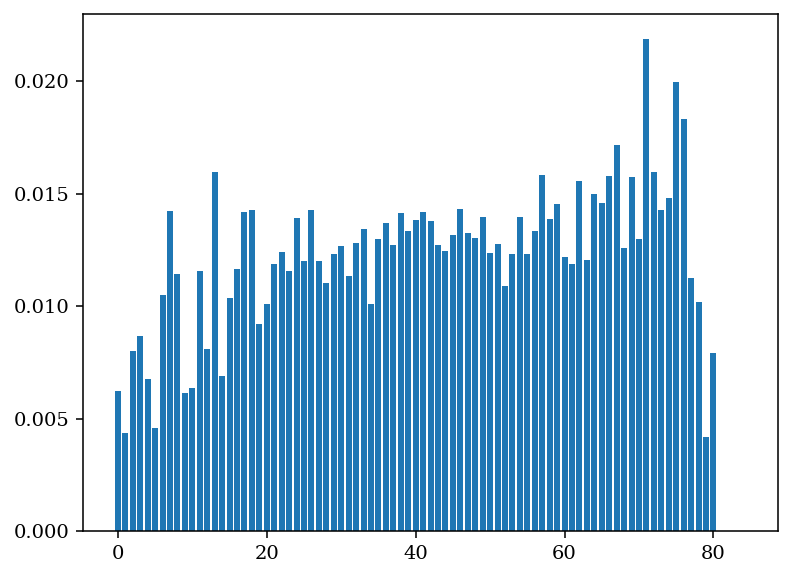

In [ ]:
from xgboost import XGBRegressor

# xgboost feature importances
model = XGBRegressor()
model.fit(X, y)
importance = model.feature_importances_

for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
X = text_vectorizer(df['Ticket'])

## 4. Model Selection and Model Training
<a name = "4"></a>
[⬆ Back to Top](#top)

In [ ]:
acc_score = {}
prec_score = {}
rec_score = {}
f1 = {}

In [ ]:
def show_scores():
  print(f'''accuracy score: {acc_score},
precision score: {prec_score},
recall score: {rec_score},
f1 score: {f1}''')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['Ticket'], df['Ticket Type'], test_size=0.2, random_state=42, shuffle=True)

First, let's identify the total number of unique words in the input dataset and calculate the average number of words per row. To do this, we will test the whole dataset.

In [ ]:
text_vectorizer = TextVectorization(max_tokens=None, # how many words in the vocabulary
                                    standardize="lower_and_strip_punctuation",
                                    split="whitespace",
                                    ngrams=None,
                                    output_mode="int",
                                    output_sequence_length=None) # how long should the output sequence of tokens will be

text_vectorizer.adapt(df['Ticket'])
vocab_size = len(text_vectorizer.get_vocabulary())
vocab_size

8381

On average, there are about 50 words per combined Ticket Subject and Ticket Description, with a vocabulary of 8000 different words. To optimize the model, you will set `max_tokens` to 7000 to filter out rare words and use an output sequence length of 60 to ensure that no additional description is lost.

In [ ]:
round(sum([len(i.split()) for i in df['Ticket']])/len(df['Ticket']))

51

For traditional models, the input data should be vectorized. However, it is crucial to vectorize the train and test sets separately to avoid data leakage.

In [ ]:
MAX_TOKENS=7000
OUTPUT_SEQUENCE_LENGTH=60

text_vectorizer = TextVectorization(max_tokens=MAX_TOKENS,
                                    standardize="lower_and_strip_punctuation",
                                    split="whitespace",
                                    output_mode="int",
                                    output_sequence_length=OUTPUT_SEQUENCE_LENGTH)

text_vectorizer.adapt(X_train)
X_train = text_vectorizer(X_train)
X_test = text_vectorizer(X_test)

MultinomialNB (Naive Bayes) is one of the commonly used traditional models for natural language processing (NLP) classification tasks.

In [ ]:
# hyperparameter tuning
parameters = {
'alpha': ( 10, 1, 0.5, 0.1, 0.05, 0.01, 0.001),
}

ml_NB = GridSearchCV(estimator=MultinomialNB(),
                     param_grid=parameters,
                     verbose=1,
                     scoring='accuracy')

#training
ml_NB_result = ml_NB.fit(X_train.numpy(), y_train)
# ml_NB_result = ml_NB.score(X_test.numpy(), y_test)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


In [ ]:
accuracy_score(ml_NB_result.best_estimator_.predict(X_test.numpy()), y_test)

0.20543093270365997

In [ ]:
# Macro Average treat all classes equally, regardless of their frequency.
scores = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
scores_dict = [acc_score, prec_score, rec_score, f1]

for x, score_dict in zip(scores, scores_dict):
  score_lr = cross_val_score(ml_NB_result.best_estimator_, X_test.numpy(), y_test, cv=3, scoring=x)
  print('Scoring metric:', x)
  print(score_lr)
  print("Avg :",np.average(score_lr))
  print('\n')
  score_dict['Multinomial NB'] = np.average(score_lr)

Scoring metric: accuracy
[0.17345133 0.16460177 0.19680851]
Avg : 0.17828720266114353


Scoring metric: precision_macro
[0.17349215 0.16571984 0.19671818]
Avg : 0.17864339056283227


Scoring metric: recall_macro
[0.17369321 0.16496943 0.1959256 ]
Avg : 0.1781960792929067


Scoring metric: f1_macro
[0.17201199 0.16349658 0.19480071]
Avg : 0.17676975883316395




the test size is too small for cross-validation, therefore, the scores can appear lower due to the limited amount of data available for testing.


In [ ]:
len(y_test)/3

564.6666666666666

Decision Trees are well known for their strength in identifying patterns and categorizing data accordingly. However, they are also prone to overfitting if not properly managed.

In [ ]:
parameters = {'criterion':['gini','entropy'],
              'max_depth':np.arange(5,15).tolist()[0::2],
              'min_samples_split':np.arange(10,50).tolist()[0::2],
              'max_leaf_nodes':np.arange(5,20).tolist()[0::2]}

# create an instance of the grid search object
dt = RandomizedSearchCV(DecisionTreeClassifier(), parameters)
dt_result = dt.fit(X_train.numpy(), y_train)

dt.score(X_test.numpy(), y_test)

0.19421487603305784

As expected, Naive Bayes proves to be more reliable than Decision Trees, as it is specifically designed for text classification tasks.

In [ ]:
scores = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
scores_dict = [acc_score, prec_score, rec_score, f1]

for x, score_dict in zip(scores, scores_dict):
  score_lr = cross_val_score(dt_result.best_estimator_, X_test.numpy(), y_test, cv=3, scoring=x)
  print('Scoring metric:', x)
  print(score_lr)
  print("Avg :",np.average(score_lr))
  print('\n')
  score_dict['Decision Tree'] = np.average(score_lr)

Scoring metric: accuracy
[0.2        0.21238938 0.19858156]
Avg : 0.2036569802715538


Scoring metric: precision_macro
[0.15016913 0.1782427  0.16368743]
Avg : 0.16403308841100783


Scoring metric: recall_macro
[0.18933717 0.20888413 0.19148501]
Avg : 0.19656876887533414


Scoring metric: f1_macro
[0.11048917 0.15968877 0.14820874]
Avg : 0.139462229386255




Neural networks are even more complex and often outperform traditional models, though they require more resources. We used these models only as a baseline for comparison.

In [ ]:
df = df[['Ticket','Ticket Type']]
df.head()

,Ticket,Ticket Type
1331,Network problem. I'm having an issue with the ...,4
5790,Account access. I'm having an issue with the N...,3
2564,Refund request. I've noticed a software bug in...,2
4227,Cancellation request. I'm having an issue with...,4
4503,Refund request. I'm having an issue with the D...,0


In [ ]:
train_sentences, val_sentences, train_labels, val_labels = train_test_split(df['Ticket'], df.drop('Ticket', axis=1), test_size=0.2, shuffle=True)

In [ ]:
text_vectorizer_2 = TextVectorization(max_tokens=MAX_TOKENS,
                                    standardize="lower_and_strip_punctuation",
                                    split="whitespace",
                                    output_mode="int",
                                    output_sequence_length=OUTPUT_SEQUENCE_LENGTH)

text_vectorizer_2.adapt(train_sentences)

**Embedding layers will be reassigned** for each neural network, as they learn patterns in texts. We want to ensure that the patterns learned by one model do not interfere with those of another.

In [ ]:
embedding = layers.Embedding(input_dim=MAX_TOKENS,
                             output_dim=128, # set size of embedding vector
                             embeddings_initializer="uniform", # default, intialize randomly
                             input_length=OUTPUT_SEQUENCE_LENGTH,
                             name="embedding_1")

There are mainly three diverse methods for training NLP tasks: GlobalAveragePooling1D, Conv1D, and recurrent layers such as LSTM, GRU, and Bidirectional layers. **Bidirectional layers generally perform better, as they process texts in both left-to-right and right-to-left directions**.

In [ ]:
# GlobalAveragePooling1D
tf.random.set_seed(42)

inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer_2(inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dense(16, activation="relu", kernel_regularizer='l1')(x) # regularizers are for overfitting
x = layers.Dropout(0.3)(x) # dropouts for overfitting, too
outputs = layers.Dense(5, activation="softmax")(x)
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense")
# Compile model
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # because we label coded, we used sparse
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])
model_1_history = model_1.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[tf.keras.callbacks.ModelCheckpoint('model_1.keras', save_best_only=True)])

Epoch 1/5
212/212 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.2003 - loss: 3.5910 - val_accuracy: 0.2096 - val_loss: 3.2845
Epoch 2/5
212/212 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2137 - loss: 3.1895 - val_accuracy: 0.2031 - val_loss: 2.9193
Epoch 3/5
212/212 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.2139 - loss: 2.8349 - val_accuracy: 0.2007 - val_loss: 2.5985
Epoch 4/5
212/212 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.2125 - loss: 2.5251 - val_accuracy: 0.1972 - val_loss: 2.3207
Epoch 5/5
212/212 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.2105 - loss: 2.2581 - val_accuracy: 0.1954 - val_loss: 2.0871


In [ ]:
# Conv1D
tf.random.set_seed(20)

model_2_embedding = layers.Embedding(input_dim=MAX_TOKENS,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=OUTPUT_SEQUENCE_LENGTH,
                                     name="embedding_5")


inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer_2(inputs)
x = model_2_embedding(x)
x = layers.Conv1D(filters=8, kernel_size=3, activation="relu")(x)
x = layers.GlobalMaxPool1D()(x)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer, but we don't want to overcomplicate the model
                                             # since it's already overfitting
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(5, activation="softmax")(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_Conv1D")

model_2.compile(loss="sparse_categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[tf.keras.callbacks.ModelCheckpoint('model_2.keras', save_best_only=True)])
#

Epoch 1/5
212/212 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.2023 - loss: 1.6210 - val_accuracy: 0.1907 - val_loss: 1.6123
Epoch 2/5
212/212 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.2230 - loss: 1.6064 - val_accuracy: 0.1901 - val_loss: 1.6126
Epoch 3/5
212/212 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.2418 - loss: 1.5947 - val_accuracy: 0.1930 - val_loss: 1.6163
Epoch 4/5
212/212 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.2636 - loss: 1.5754 - val_accuracy: 0.1924 - val_loss: 1.6178
Epoch 5/5
212/212 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.2825 - loss: 1.5546 - val_accuracy: 0.1842 - val_loss: 1.6263


In [ ]:
# Create Bidirectional LSTM model
tf.random.set_seed(42)

model_3_embedding = layers.Embedding(input_dim=MAX_TOKENS,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=OUTPUT_SEQUENCE_LENGTH,
                                     name="embedding_3")

inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer_2(inputs)
x = model_3_embedding(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
x = layers.Dropout(0.5)(x)
# x = layers.Dense(32, activation="relu")(x)
outputs = layers.Dense(5, activation="softmax")(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_LSTM")

model_3.compile(loss="sparse_categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # lowered the lr to see if it would increase with val_accuracy
                                                                          # while accuracy on training set increases
                metrics=["accuracy"])

model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=10,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[tf.keras.callbacks.ModelCheckpoint('model_3.keras', save_best_only=True)])

Epoch 1/10
212/212 ━━━━━━━━━━━━━━━━━━━━ 27s 103ms/step - accuracy: 0.2037 - loss: 1.6099 - val_accuracy: 0.1948 - val_loss: 1.6098
Epoch 2/10
212/212 ━━━━━━━━━━━━━━━━━━━━ 24s 111ms/step - accuracy: 0.2173 - loss: 1.6089 - val_accuracy: 0.1954 - val_loss: 1.6100
Epoch 3/10
212/212 ━━━━━━━━━━━━━━━━━━━━ 38s 98ms/step - accuracy: 0.2253 - loss: 1.6080 - val_accuracy: 0.1954 - val_loss: 1.6101
Epoch 4/10
212/212 ━━━━━━━━━━━━━━━━━━━━ 41s 98ms/step - accuracy: 0.2291 - loss: 1.6068 - val_accuracy: 0.1895 - val_loss: 1.6106
Epoch 5/10
212/212 ━━━━━━━━━━━━━━━━━━━━ 24s 115ms/step - accuracy: 0.2392 - loss: 1.6031 - val_accuracy: 0.1883 - val_loss: 1.6267
Epoch 6/10
212/212 ━━━━━━━━━━━━━━━━━━━━ 22s 102ms/step - accuracy: 0.2612 - loss: 1.5877 - val_accuracy: 0.1818 - val_loss: 1.6379
Epoch 7/10
212/212 ━━━━━━━━━━━━━━━━━━━━ 46s 126ms/step - accuracy: 0.2815 - loss: 1.5538 - val_accuracy: 0.1960 - val_loss: 1.6673
Epoch 8/10
212/212 ━━━━━━━━━━━━━━━━━━━━ 37s 109ms/step - accuracy: 0.3183 - loss: 1.4

It seems the model is struggling to learn effectively. **Transfer learning** might be helpful in this case. Popular transfer learning methods for NLP include Google's **Universal Sentence Encoder, GloVe, and Word2Vec.**

Universal Sentence Encoder Transfer Learning

In [ ]:
tf.random.set_seed(42)

# We can use this encoding layer in place of our text_vectorizer and embedding layer
class UniversalSentenceEncoderLayer(tf.keras.layers.Layer):
    def call(self, inputs):
        sentence_encoder_layer = tf_keras.Sequential(hub.KerasLayer(
            "https://www.kaggle.com/models/google/universal-sentence-encoder/TensorFlow2/universal-sentence-encoder/2",
            input_shape=[],
            dtype=tf.string,
            trainable=False,
            name="USE"))

        return sentence_encoder_layer(inputs)

inputs = tf.keras.Input(shape=(1,), dtype=tf.string)
x = UniversalSentenceEncoderLayer()(inputs)
x = tf.keras.layers.Dense(32, activation='relu',)(x)
outputs = tf.keras.layers.Dense(5, activation='softmax')(x)
model_4 = tf.keras.Model(inputs, outputs)

model_4.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

model_4.fit(train_sentences, train_labels, epochs=10, validation_data=(val_sentences, val_labels),
            callbacks=[tf.keras.callbacks.ModelCheckpoint('model_4.keras', save_best_only=True)])

Epoch 1/10
212/212 ━━━━━━━━━━━━━━━━━━━━ 33s 56ms/step - accuracy: 0.1960 - loss: 1.6111 - val_accuracy: 0.1989 - val_loss: 1.6112
Epoch 2/10
212/212 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.2366 - loss: 1.6035 - val_accuracy: 0.1972 - val_loss: 1.6134
Epoch 3/10
212/212 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.2484 - loss: 1.5984 - val_accuracy: 0.1901 - val_loss: 1.6170
Epoch 4/10
212/212 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.2587 - loss: 1.5932 - val_accuracy: 0.1930 - val_loss: 1.6207
Epoch 5/10
212/212 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.2673 - loss: 1.5870 - val_accuracy: 0.2013 - val_loss: 1.6248
Epoch 6/10
212/212 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.2726 - loss: 1.5802 - val_accuracy: 0.2013 - val_loss: 1.6283
Epoch 7/10
212/212 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.2816 - loss: 1.5733 - val_accuracy: 0.2037 - val_loss: 1.6327
Epoch 8/10
212/212 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.2885 - loss: 1.5657 - val_ac

 Word2Vec Transfer Learning

In [ ]:
tf.random.set_seed(42)

# Download and load the pre-trained Word2Vec model
word2vec = api.load("word2vec-google-news-300")

embedding_dim = 300  # Word2Vec embedding size

# Initialize embedding matrix with zeros
embedding_matrix = np.zeros((MAX_TOKENS, embedding_dim))
vocab = text_vectorizer_2.get_vocabulary()

# Fill the embedding matrix with Word2Vec vectors
for i, word in enumerate(vocab):
    if word in word2vec:
        embedding_matrix[i] = word2vec[word]

model_5_embedding = layers.Embedding(
    input_dim=MAX_TOKENS,
    output_dim=embedding_dim,
    weights=[embedding_matrix],
    input_length=OUTPUT_SEQUENCE_LENGTH,
    trainable=False,  # Set to False to keep the embeddings fixed
    name="embedding_5"
)

inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer_2(inputs)
x = model_5_embedding(x)
x = layers.Bidirectional(layers.LSTM(128, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(128, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
x = layers.Dense(32, activation="relu")(x)
outputs = layers.Dense(5, activation="softmax")(x)
model_5 = tf.keras.Model(inputs, outputs, name="model_5")

model_5.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

model_5_history = model_5.fit(
    train_sentences,
    train_labels,
    epochs=10,
    validation_data=(val_sentences, val_labels),
    callbacks=[early_stopping, tf.keras.callbacks.ModelCheckpoint('model_5.keras', save_best_only=True)]
)


Epoch 1/10
212/212 ━━━━━━━━━━━━━━━━━━━━ 198s 868ms/step - accuracy: 0.2035 - loss: 1.6126 - val_accuracy: 0.1989 - val_loss: 1.6094
Epoch 2/10
212/212 ━━━━━━━━━━━━━━━━━━━━ 188s 801ms/step - accuracy: 0.2017 - loss: 1.6099 - val_accuracy: 0.1842 - val_loss: 1.6096
Epoch 3/10
212/212 ━━━━━━━━━━━━━━━━━━━━ 199s 789ms/step - accuracy: 0.2072 - loss: 1.6094 - val_accuracy: 0.1995 - val_loss: 1.6099
Epoch 4/10
212/212 ━━━━━━━━━━━━━━━━━━━━ 169s 796ms/step - accuracy: 0.2084 - loss: 1.6089 - val_accuracy: 0.1954 - val_loss: 1.6101


When your model can't improve, it is often related to either data preprocessing or the data itself.

In terms of data preprocessing, we are working with three columns.
Combining text columns is a common practice for NLP neural networks.
Both one-hot encoding and label encoding should work fine for the target variable, given that the loss function supports sparse data.
Therefore, we can conclude that the probability of errors in data preprocessing is minimal. Let's now analyze the data itself.


In [ ]:
df.head()

,Ticket,Ticket Type
1331,Network problem. I'm having an issue with the ...,4
5790,Account access. I'm having an issue with the N...,3
2564,Refund request. I've noticed a software bug in...,2
4227,Cancellation request. I'm having an issue with...,4
4503,Refund request. I'm having an issue with the D...,0


In [ ]:
df['Ticket']

1331    Network problem. I'm having an issue with the ...
5790    Account access. I'm having an issue with the N...
2564    Refund request. I've noticed a software bug in...
4227    Cancellation request. I'm having an issue with...
4503    Refund request. I'm having an issue with the D...
                              ...                        
3739    Payment issue. I'm having an issue with the Pl...
6230    Hardware issue. I'm having an issue with the N...
6746    Network problem. I'm facing issues logging int...
1872    Peripheral compatibility. I'm having an issue ...
4975    Account access. I'm encountering a software bu...
Name: Ticket, Length: 8469, dtype: object

In [ ]:
col_mapping

,Original,Encoded
0,Billing inquiry,0
1,Cancellation request,1
2,Product inquiry,2
3,Refund request,3
4,Technical issue,4


Upon analyzing the data, we observed that the Ticket Subject doesn't necessarily relate to the Ticket Type column, and the Ticket Description does not specify what the ticket is for. It only indicates that the customer has a certain problem, without clarifying what is needed.

This disconnect could be why the models are struggling to learn. A possible solution is to create **synthetic data** by mapping similar tickets together. This approach could help improve model performance by providing more relevant and coherent examples.


In [ ]:
tf.random.set_seed(42)

text_vectorizer = TextVectorization(max_tokens=MAX_TOKENS,
                                    standardize="lower_and_strip_punctuation",
                                    split="whitespace",
                                    output_mode="int",
                                    output_sequence_length=OUTPUT_SEQUENCE_LENGTH)

text_vectorizer.adapt(train_sentences)
X_vector = text_vectorizer(df['Ticket'])

from sklearn.cluster import KMeans

num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

y_pred = kmeans.fit_predict(X_vector)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

We can also visualize the repetition rates of clusters according to the ground truth labels. This will help us understand how well the clusters align with the actual categories and identify any potential discrepancies.

In [ ]:
pd.crosstab(df['Ticket Type'], y_pred)

col_0,0,1,2
Ticket Type,,,
0,1291,114,229
1,1333,131,231
2,1305,117,219
3,1419,112,221
4,1416,116,215


In [ ]:
pd.value_counts(y_pred)

0    6764
2    1115
1     590
Name: count, dtype: int64

Because the labels are imbalanced, we will use the F1 metric to measure performance. The F1 score balances precision and recall, providing a more comprehensive evaluation in the presence of imbalanced classes.

In [ ]:
train_sentences, val_sentences, train_labels, val_labels = train_test_split(df['Ticket'], y_pred, test_size=0.2)

In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import F1Score

# Convert labels to one-hot encoding
train_labels_one_hot = to_categorical(train_labels, num_classes=5)
val_labels_one_hot = to_categorical(val_labels, num_classes=5)

tf.random.set_seed(42)

model_6_embedding = layers.Embedding(input_dim=MAX_TOKENS,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=OUTPUT_SEQUENCE_LENGTH,
                                     name="embedding_6")

inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer_2(inputs)
x = model_6_embedding(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
# x = layers.Dropout(0.5)(x)
# x = layers.Dense(32, activation="relu")(x)
outputs = layers.Dense(5, activation="softmax")(x)
model_6 = tf.keras.Model(inputs, outputs, name="model_6_LSTM")

# Compile the model
model_6.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=[F1Score(average='macro')])


early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)
# Train the model
model_6_history = model_6.fit(train_sentences,
                              train_labels_one_hot,
                              epochs=10,
                              validation_data=(val_sentences, val_labels_one_hot),
                              callbacks=[early_stopping, tf.keras.callbacks.ModelCheckpoint('model_6.keras', save_best_only=True)])
#

Epoch 1/10
212/212 ━━━━━━━━━━━━━━━━━━━━ 32s 126ms/step - f1_score: 0.1826 - loss: 0.7531 - val_f1_score: 0.1778 - val_loss: 0.5368
Epoch 2/10
212/212 ━━━━━━━━━━━━━━━━━━━━ 33s 155ms/step - f1_score: 0.1986 - loss: 0.4816 - val_f1_score: 0.3256 - val_loss: 0.4790
Epoch 3/10
212/212 ━━━━━━━━━━━━━━━━━━━━ 31s 108ms/step - f1_score: 0.4273 - loss: 0.3257 - val_f1_score: 0.3729 - val_loss: 0.5126
Epoch 4/10
212/212 ━━━━━━━━━━━━━━━━━━━━ 41s 109ms/step - f1_score: 0.5269 - loss: 0.1740 - val_f1_score: 0.3562 - val_loss: 0.6065
Epoch 5/10
212/212 ━━━━━━━━━━━━━━━━━━━━ 23s 106ms/step - f1_score: 0.5656 - loss: 0.0915 - val_f1_score: 0.3684 - val_loss: 0.7408


In [ ]:
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]

terms = text_vectorizer.get_vocabulary()

# Print the top 10 terms for each cluster
for i in range(num_clusters):
    print(f"Cluster {i} top terms:")
    for ind in order_centroids[i, :10]:
        print(terms[ind])
    print("\n")

Cluster 0 top terms:
ive
and
assist
i
having
is
you
but
this
on


Cluster 1 top terms:
of
in
product
for
this
on
problem
but
be
you


Cluster 2 top terms:
software
if
can
not
data
that
any
account
or
be




While this method may not be entirely reliable, we can tentatively categorize the clusters as follows:

- Cluster 0: Technical issues
- Cluster 1: Product issues
- Cluster 2: Software/account issues

As a last resort, we can train the model using the Ticket Subject column and evaluate if it has a significant relationship with the clusters. This approach might provide additional insights into the nature of the data and improve classification accuracy.

In [ ]:
df_2 = df_2[['Ticket Description','Ticket Subject']]
df_2

,Ticket Description,Ticket Subject
1331,I'm having an issue with the Autodesk AutoCAD....,Network problem
5790,I'm having an issue with the Nintendo Switch P...,Account access
2564,I've noticed a software bug in the Roomba Robo...,Refund request
4227,I'm having an issue with the Apple AirPods. Pl...,Cancellation request
4503,I'm having an issue with the Dell XPS. Please ...,Refund request
...,...,...
3739,I'm having an issue with the PlayStation. Plea...,Payment issue
6230,I'm having an issue with the Nest Thermostat. ...,Hardware issue
6746,I'm facing issues logging into my Fitbit Versa...,Network problem
1872,I'm having an issue with the Roomba Robot Vacu...,Peripheral compatibility


In [ ]:
df_2['Ticket Subject'].nunique()

16

In [ ]:
df_2['Ticket Subject'].value_counts()

Ticket Subject
Refund request              576
Software bug                574
Product compatibility       567
Delivery problem            561
Hardware issue              547
Battery life                542
Network problem             539
Installation support        530
Product setup               529
Payment issue               526
Product recommendation      517
Account access              509
Peripheral compatibility    496
Data loss                   491
Cancellation request        487
Display issue               478
Name: count, dtype: int64

Grouping some of the 16 categories can help simplify the problem and make it more manageable. Let's identify potential groups and combine related categories to reduce the number:

* Order and Payment Issues:
 * Refund request
 * Payment issue
 * Cancellation request
 * Delivery problem

* Product Issues:
  * Software bug
  * Hardware issue
  * Battery life
  * Display issue
  * Product compatibility
  * Peripheral compatibility
  * Network problem
  * Data loss

* Support and Setup:
  * Installation support
  * Product setup
  * Account access

* Product Guidance:
  * Product recommendation

In [ ]:
category_mapping = {
    'Refund request': 'Order and Payment Issue',
    'Payment issue': 'Order and Payment Issue',
    'Cancellation request': 'Order and Payment Issue',
    'Delivery problem': 'Order and Payment Issue',
    'Software bug': 'Product Issue',
    'Hardware issue': 'Product Issue',
    'Battery life': 'Product Issue',
    'Display issue': 'Product Issue',
    'Product compatibility': 'Product Issue',
    'Peripheral compatibility': 'Product Issue',
    'Network problem': 'Product Issue',
    'Data loss': 'Product Issue',
    'Installation support': 'Support and Setup',
    'Product setup': 'Support and Setup',
    'Account access': 'Support and Setup',
    'Product recommendation': 'Product Guidance'
}

In [ ]:
df_2['Ticket Subject'] = df_2['Ticket Subject'].map(category_mapping)

In [ ]:
df_2['Ticket Subject'].value_counts()

Ticket Subject
Product Issue              4234
Order and Payment Issue    2150
Support and Setup          1568
Product Guidance            517
Name: count, dtype: int64

In [ ]:
df_2.head()

,Ticket Description,Ticket Subject
1331,I'm having an issue with the Autodesk AutoCAD....,Product Issue
5790,I'm having an issue with the Nintendo Switch P...,Support and Setup
2564,I've noticed a software bug in the Roomba Robo...,Order and Payment Issue
4227,I'm having an issue with the Apple AirPods. Pl...,Order and Payment Issue
4503,I'm having an issue with the Dell XPS. Please ...,Order and Payment Issue


In [ ]:
train_sentences, val_sentences, train_labels, val_labels = train_test_split(df_2['Ticket Description'], df_2['Ticket Subject'], test_size=0.2, shuffle=True)

In [ ]:
# Convert labels to one-hot encoding
train_labels_one_hot = pd.get_dummies(train_labels)
val_labels_one_hot = pd.get_dummies(val_labels)

# Ensure the random seed is set
tf.random.set_seed(42)

# Embedding layer
model_7_embedding = layers.Embedding(input_dim=MAX_TOKENS,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=OUTPUT_SEQUENCE_LENGTH,
                                     name="embedding_7")

# Input layer
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer_2(inputs)
x = model_7_embedding(x)
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
x = layers.Dense(32, activation="relu")(x)
outputs = layers.Dense(4, activation="softmax")(x)
model_7 = tf.keras.Model(inputs, outputs, name="model_7_LSTM")

# Compile the model
model_7.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=[F1Score(average='macro')])

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=4,
    restore_best_weights=True
)
# Train the model
model_7_history = model_7.fit(train_sentences,
                              train_labels_one_hot,
                              epochs=15,
                              validation_data=(val_sentences, val_labels_one_hot),
                              callbacks=[early_stopping, tf.keras.callbacks.ModelCheckpoint('model_7.keras', save_best_only=True)])

Epoch 1/15
212/212 ━━━━━━━━━━━━━━━━━━━━ 56s 222ms/step - f1_score: 0.1671 - loss: 1.2122 - val_f1_score: 0.1693 - val_loss: 1.1709
Epoch 2/15
212/212 ━━━━━━━━━━━━━━━━━━━━ 83s 229ms/step - f1_score: 0.1667 - loss: 1.1814 - val_f1_score: 0.1693 - val_loss: 1.1728
Epoch 3/15
212/212 ━━━━━━━━━━━━━━━━━━━━ 84s 239ms/step - f1_score: 0.2263 - loss: 1.1468 - val_f1_score: 0.1831 - val_loss: 1.1943
Epoch 4/15
212/212 ━━━━━━━━━━━━━━━━━━━━ 95s 298ms/step - f1_score: 0.2989 - loss: 1.0723 - val_f1_score: 0.2216 - val_loss: 1.3416
Epoch 5/15
212/212 ━━━━━━━━━━━━━━━━━━━━ 69s 235ms/step - f1_score: 0.3434 - loss: 1.0006 - val_f1_score: 0.2236 - val_loss: 1.4549


This method resulted in even worse performance for the four categories. However, given that the Ticket Description does not specify exactly what the customer wants, it was expected that NLP might not learn effective patterns.

## 5. Model Evaluation Metrics
<a name = "5"></a>
[⬆ Back to Top](#top)

In [ ]:
show_scores()

accuracy score: {'Multinomial NB': 0.17828720266114353, 'Decision Tree': 0.20366011841251908},
precision score: {'Multinomial NB': 0.17864339056283227, 'Decision Tree': 0.17011888878951031},
recall score: {'Multinomial NB': 0.1781960792929067, 'Decision Tree': 0.19682378682643123},
f1 score: {'Multinomial NB': 0.17676975883316395, 'Decision Tree': 0.14018689309156548}


In [ ]:
from tensorflow.keras.models import load_model

model_1 = load_model('model_1.keras')
model_2 = load_model('model_2.keras')
model_3 = load_model('model_3.keras')
model_4 = load_model('model_4.keras', custom_objects={'UniversalSentenceEncoderLayer': UniversalSentenceEncoderLayer})
model_5 = load_model('model_5.keras')
model_6 = load_model('model_6.keras')
model_7 = load_model('model_7.keras')

In [ ]:
train_sentences, val_sentences, train_labels, val_labels = train_test_split(df['Ticket'], df.drop('Ticket', axis=1), test_size=0.2, shuffle=True)

Here, we're recording accuracy, precision, recall, and F1 scores averaged on a macro basis. This method treats all classes equally, regardless of their support values, and calculates the unweighted mean of all per-class scores.

In [ ]:
# Recording metrics

val_sentences = np.array(val_sentences)
val_labels = np.array(val_labels)

# Define the number of splits
X = 3
models = [model_1, model_2, model_3, model_4, model_5, model_6, model_7]
model_names = ['Global Pooling','Conv1D', 'Bidirectional LSTM', 'USE', 'Word2Vec', 'Synthetic data', 'Grouping']

for model, model_name in zip(models, model_names):
    if model == model_6 or model == model_7:
        train_sentences, val_sentences, train_labels, val_labels = train_test_split(df['Ticket'], y_pred, test_size=0.2)
    split_sentences = np.array_split(val_sentences, X)
    split_labels = np.array_split(val_labels, X)
    for i in range(X):
        y_test = split_labels[i]
        X_test = np.expand_dims(split_sentences[i], axis=-1)

        y_pred_model = model.predict(X_test)
        y_pred_classes = np.argmax(y_pred_model, axis=1)

        acc_score[model_name] = accuracy_score(y_test, y_pred_classes)
        prec_score[model_name] = precision_score(y_test, y_pred_classes, average='macro')
        rec_score[model_name] = recall_score(y_test, y_pred_classes, average='macro')
        f1[model_name] = f1_score(y_test, y_pred_classes, average='macro')

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 218ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 234ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 304ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step


In [ ]:
show_scores()

accuracy score: {'Multinomial NB': 0.17828720266114353, 'Decision Tree': 0.2036569802715538, 'Global Pooling': 0.225177304964539, 'Conv1D': 0.24468085106382978, 'Bidirectional LSTM': 0.20035460992907803, 'USE': 0.21808510638297873, 'Word2Vec': 0.22340425531914893, 'Synthetic data': 0.08333333333333333, 'Grouping': 0.11879432624113476},
precision score: {'Multinomial NB': 0.17864339056283227, 'Decision Tree': 0.16403308841100783, 'Global Pooling': 0.0450354609929078, 'Conv1D': 0.2230190405952846, 'Bidirectional LSTM': 0.2563343401684676, 'USE': 0.20858007674164541, 'Word2Vec': 0.1108695652173913, 'Synthetic data': 0.04869654577358965, 'Grouping': 0.03959810874704492},
recall score: {'Multinomial NB': 0.1781960792929067, 'Decision Tree': 0.19656876887533414, 'Global Pooling': 0.2, 'Conv1D': 0.24190536527761614, 'Bidirectional LSTM': 0.20724511447563304, 'USE': 0.21909376270494924, 'Word2Vec': 0.19953339165937592, 'Synthetic data': 0.20238095238095236, 'Grouping': 0.3333333333333333},
f1 

Text(0.5, 1.0, 'Accuracy Scores')

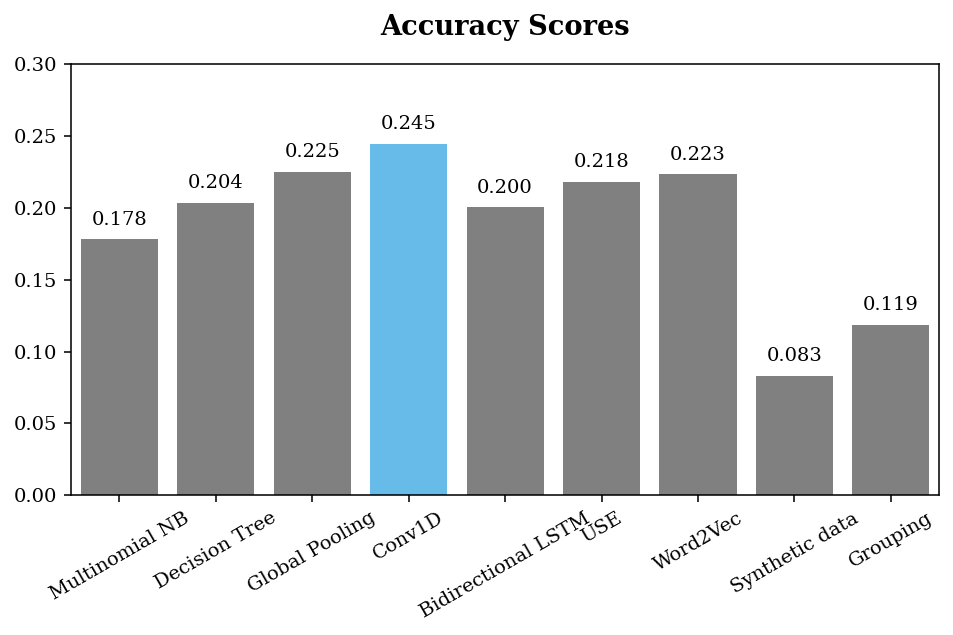

In [ ]:
plt.figure(figsize=(8,4))
plt.rcParams["font.family"] = "serif"

cols = ['grey' if (x < max(acc_score.values())) else colors[1] for x in acc_score.values()]
ax = sns.barplot(acc_score, x=acc_score.keys(), y=acc_score.values(), palette=cols)
ax.set_xticklabels(acc_score.keys(),rotation=30)
plt.ylim(0, 0.3)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.3f'), (p.get_x() + p.get_width() / 2., p.get_height()),
       ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

ax.set_title('Accuracy Scores', fontdict={'fontsize': 14, 'fontweight': 'semibold'}, pad=15)

Text(0.5, 1.0, 'Precision Scores')

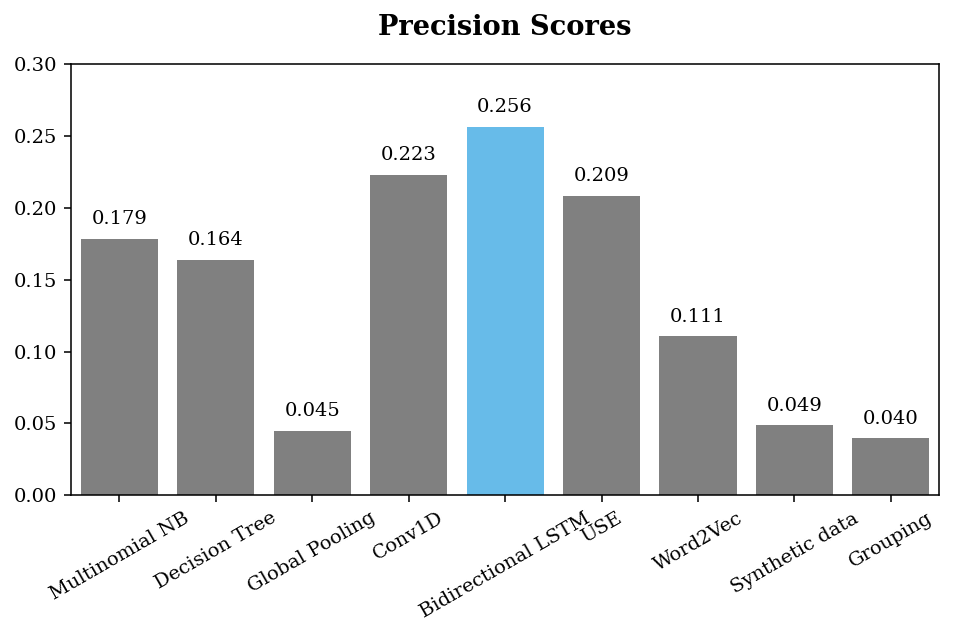

In [ ]:
# plotting precision scores
plt.figure(figsize=(8,4))
plt.rcParams["font.family"] = "serif"
cols = ['grey' if (x < max(prec_score.values())) else colors[1] for x in prec_score.values()]
ax = sns.barplot(prec_score, x=prec_score.keys(), y=prec_score.values(), palette=cols)
ax.set_xticklabels(prec_score.keys(),rotation=30)
plt.ylim(0, 0.3)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.3f'), (p.get_x() + p.get_width() / 2., p.get_height()),
       ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
ax.set_title('Precision Scores', fontdict={'fontsize': 14, 'fontweight': 'semibold'}, pad=15)

Text(0.5, 1.0, 'Recall Scores')

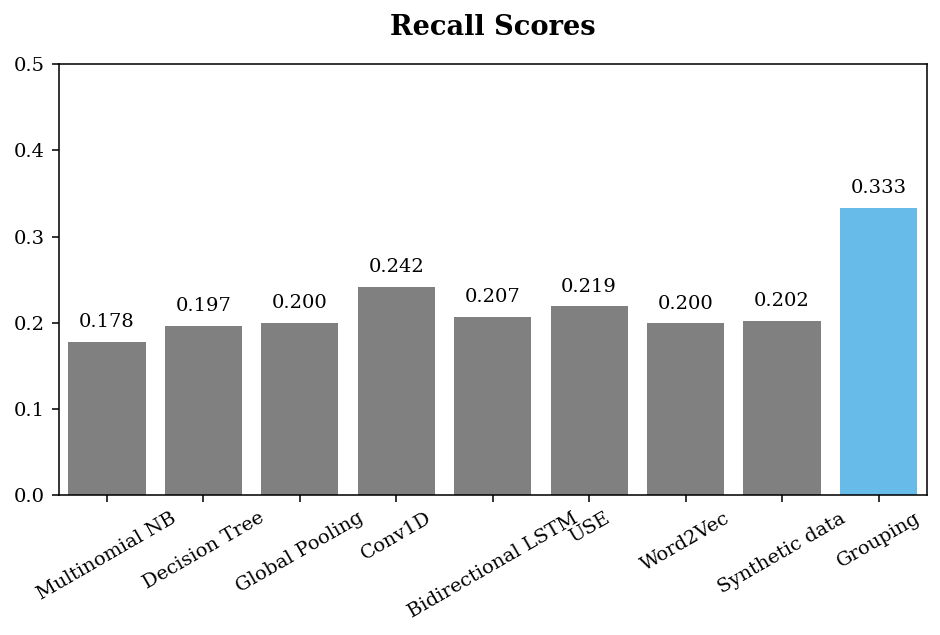

In [ ]:
# plotting recall scores
plt.figure(figsize=(8,4))
plt.rcParams["font.family"] = "serif"
cols = ['grey' if (x < max(rec_score.values())) else colors[1] for x in rec_score.values()]
ax = sns.barplot(rec_score, x=rec_score.keys(), y=rec_score.values(), palette=cols)
ax.set_xticklabels(rec_score.keys(),rotation=30)
plt.ylim(0, 0.5)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.3f'), (p.get_x() + p.get_width() / 2., p.get_height()),
       ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
ax.set_title('Recall Scores', fontdict={'fontsize': 14, 'fontweight': 'semibold'}, pad=15)

Text(0.5, 1.0, 'F1 Scores')

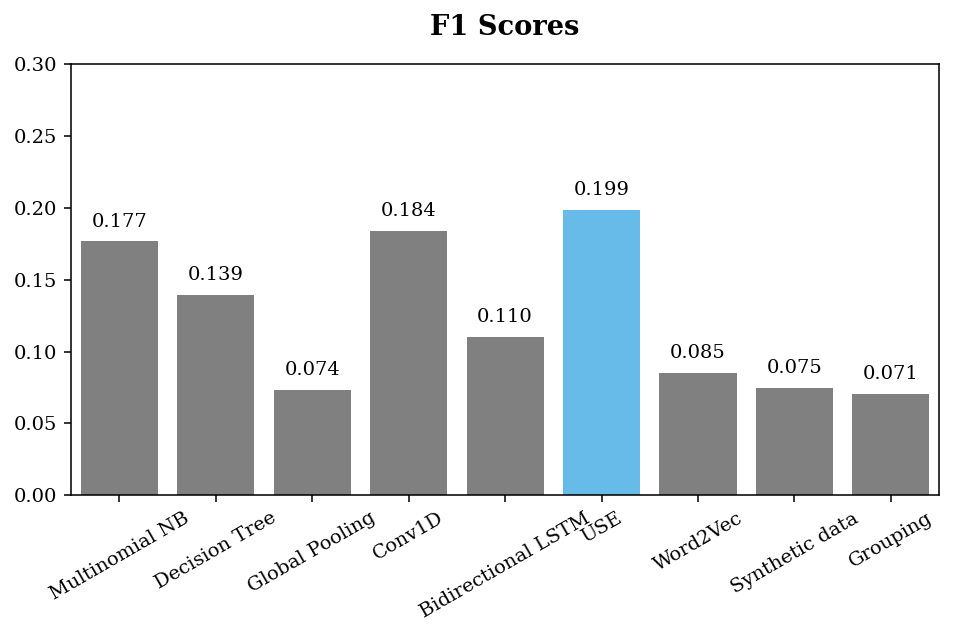

In [ ]:
# plotting f1 scores
plt.figure(figsize=(8,4))
plt.rcParams["font.family"] = "serif"
cols = ['grey' if (x < max(f1.values())) else colors[1] for x in f1.values()]
ax = sns.barplot(f1, x=f1.keys(), y=f1.values(), palette=cols)
ax.set_xticklabels(f1.keys(),rotation=30)
plt.ylim(0, 0.3)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.3f'), (p.get_x() + p.get_width() / 2., p.get_height()),
       ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
ax.set_title('F1 Scores', fontdict={'fontsize': 14, 'fontweight': 'semibold'}, pad=15)

Looking at it this way, it’s hard to estimate which model performed best. However, Conv1D, Bidirectional LSTM, and USE are noteworthy. Let's compare them.

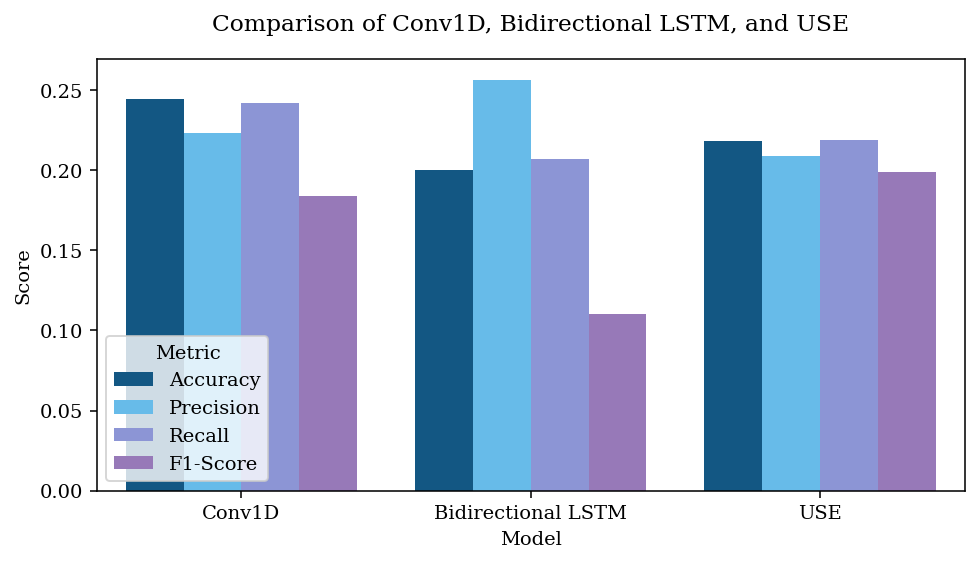

In [ ]:
data = pd.DataFrame({
    'Model': ['Conv1D', 'Bidirectional LSTM', 'USE'],
    'Accuracy': [acc_score['Conv1D'], acc_score['Bidirectional LSTM'], acc_score['USE']],
    'Precision': [prec_score['Conv1D'], prec_score['Bidirectional LSTM'], prec_score['USE']],
    'Recall': [rec_score['Conv1D'], rec_score['Bidirectional LSTM'], rec_score['USE']],
    'F1-Score': [f1['Conv1D'], f1['Bidirectional LSTM'], f1['USE']]
})

data_melted = data.melt(id_vars='Model', var_name='Metric', value_name='Score')

fig = plt.figure(figsize=(8, 4))
sns.barplot(x='Model', y='Score', hue='Metric', data=data_melted, palette=colors)
plt.title('Comparison of Conv1D, Bidirectional LSTM, and USE', y=1.04)
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend(title='Metric', loc='lower left')
plt.show()

Now, it's easier to identify that Universal Sentence Encoder (USE) Transfer Learning has the least variation among all models. However, if you prioritize high accuracy and recall rates, you might consider Conv1D, as it is also a more lightweight model.

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


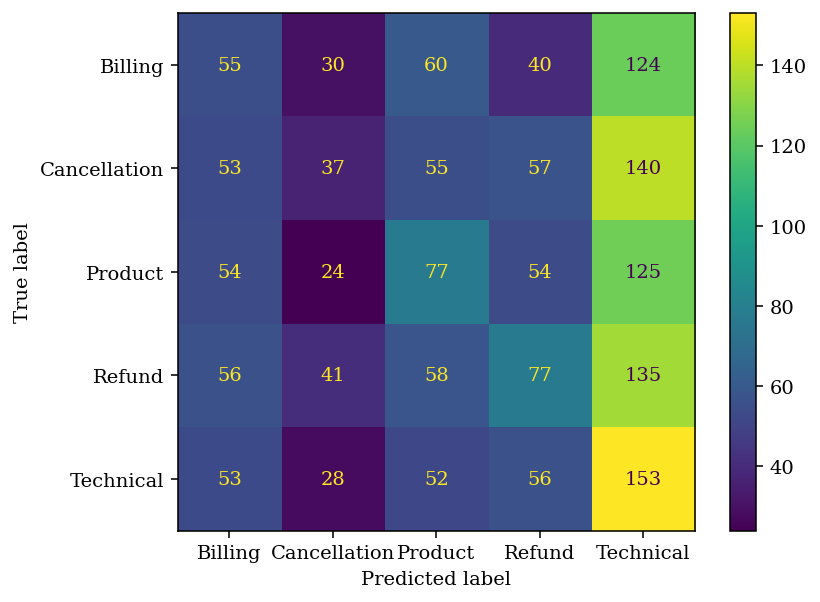

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

train_sentences, val_sentences, train_labels, val_labels = train_test_split(df['Ticket'], df.drop('Ticket', axis=1), test_size=0.2, shuffle=True)

val_predictions_proba = model_4.predict(val_sentences)
val_predictions = np.argmax(val_predictions_proba, axis=1)
class_names = ['Billing', 'Cancellation', 'Product', 'Refund', 'Technical']

ConfusionMatrixDisplay.from_predictions(val_labels, val_predictions, display_labels=class_names)

From the confusion matrix, it is evident that the model has a tendency to classify instances primarily into the "technical issues" category. To address this issue, company can consider the following steps:

- **Analyze Technical Issue Categories**: Investigate the technical issue categories more closely to ensure they are sufficiently distinct from other categories.
- **Clean the Data**: Improve the data quality by reducing noise and ensuring that technical issues are accurately represented.
- **Gather More Data**: Increase the dataset size to provide the model with a more comprehensive view of all categories, which can help in improving classification performance.



## 6. Detailed Deployment Process for `model_4`

<a name = "6"></a>
[⬆ Back to Top](#top)

**1. Track and manage versions with MLFlow:**

First, I would save my trained model so that it is in a form that easily loads into deployment. In TensorFlow, this can be completed using the save method. For example, I would save my model, that is already trained, as `'model_4.keras'` by using the following command: `model_4.save('model_4.keras')`. I can also use MLFlow to track and manage versions of my model. MLFlow enables me to log the model, handle its versions, and provides reproducibility. Later, log the model using:
```mlflow.tensorflow.log_model(model_4, "customer_service_model")```
and register it in MLFlow’s Model Registry to keep track of different versions with:
```
result = mlflow.register_model(
    "runs:/<RUN_ID>/customer_service_model",
    "CustomerServiceModel"
)
```

**2. Handle incoming requests and return predictions**

I, then, woudl serve my model with the help of Docker because it allows me to have a reproducible runtime environment, and create a Dockerfile that will include dependencies and the serving script for model_4. This Dockerfile uses a TensorFlow base image to copy the application files into the Docker container and install the required Python packages. Then, specify the command to run the serving code. For example, I create a Dockerfile in the root directory of Django project:


```
FROM tensorflow/tensorflow:latest

# Set the working dir
WORKDIR /app

# Copy directory into container
COPY . /app

# Install packages
RUN pip install -r requirements.txt

EXPOSE 8000

# Define environment
ENV DJANGO_SETTINGS_MODULE=myproject.settings

# Run server
CMD ["python", "manage.py", "runserver", "0.0.0.0:8000"]
```
Next, I would create a code to serve the model. A simple way to set up an API for model would be with Django. The application will load the model and define endpoint API, which accepts requests, processes them, and returns predictions, such as:

```
class PredictView(View):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.model = tf.keras.models.load_model('model_4.keras')

    @csrf_exempt
    def post(self, request, *args, **kwargs):
        data = json.loads(request.body)
        sentences = [data['sentence']]
        predictions = self.model.predict(sentences)
        return JsonResponse({'prediction': predictions.tolist()})

```
Finally, I would build the Docker image using `docker build -t customer_service_model_django:latest .` and run the container with `docker run -p 8000:8000 customer_service_model_django:latest`.

**3. Automate deployment:**

Next is to design a CI/CD pipeline on GitLab to automate the deployment process. This pipeline would test the code, building Docker images, and its deployment. For instance, on GitLab, I could define a workflow that checks out my code, sets up Python, installs dependencies, runs tests, builds the Docker image, and then pushes it to some repository. Hence, any changes made to model_4 USE will have changes automatically tested and deployed.

**4. Measure metrics:**

After deploying model, monitoring is essential to ensure it performs as expected. I can use MLFlow to log metrics during usage, such as prediction times.
```
mlflow.log_metric("prediction_time", prediction_time)
```
Even additionally, tools like Prometheus and Grafana can be used to track metrics like CPU and memory usage. Prometheus will measure metrics from the Django application, and Grafana would visualize these metrics.

**5. Automate workflows and real-time predicting:**

To manage the entire deployment lifecycle, I would use tools like Apache Airflow and Apache Kafka. Apache Airflow can automate workflows such as data preprocessing, model training, and deployment. On the other hand, for real-time data processing, Apache Kafka can handle streaming data and manage the flow of incoming requests.

The difference here is that Kafka will allow me to process data and make predictions in real-time, making sure that the deployment can handle live requests effectively, while Airflow is for the automation of steps.



---



---


**What's more?**

After dedicating countless hours to the project, we discovered that our efforts were misguided and the model was not reflecting real customer experiences. It had significant bias, and also an accuracy rate of around 20%. Deploying such a model would be incredibly risky anyways!?

We then realized the need to collect and preprocess the data properly to avoid these issues. However, gathering that data would require substantial additional resources and investment, which the company is understandably hesitant to commit after collecting 8000 records. Even if we secured the resources, the influx of tickets wouldn't happen overnight.

So, in the meantime, let's take a moment to have a cup of coffee ☕☕☕